# Análisis de dataset: Comportamiento de retención del personal en una empresa de Desarrollo Automotríz
### Suministrado por: nombre reservado
### Sector económico: Industrial
#### API: https://www.datos.gov.co/resource/w3uf-w9ey.csv , última actualización: 11 de junio de 2024
##### Dataset tomado el 07 de enero de 2025
##### Análisis realizado por Said Ali Oviedo Beltrán

## Interés del negocio y Objetivos:

**Propósito del análisis**: Determinar cuales son los factores relevantes que conducen a la deserción de cargos laborales.

**Obetivo general del análisis**: Construir un modelo estadístico que permita predecir posibles deserciones futuras para el talento humano vigente.

**Objetivos específicos:**
- Realizar la limpieza y validación adecuada del conjunto de datos.
- Analizar e interpretar los datos crudos.
- Determinar cual modelo estadístico es el más apropiado para la modelación.
- Construir el modelo predictivo.
- Evaluar los resultados del modelo.
- Interpretar los resultados y compartir recomendaciones pertinentes con los grupos de interés.

**Reglas o hechos del negocio a tener en cuenta:**
- El dataset comprende el registro de variables de productividad, desempeño y satisfacción de trabajadores, de entre el 23 de febrero del 2016 y el 03 de diciembre de 2023.
- El dataset se compone de 14.999 registros y 11 campos.

**Resúmen:**
- Algunas preguntas que pueden conducir el EDA:
>- ***QUIÉNES*** son los trabajadores con más tendencia a retirarse del cargo?
>- ***POR QUÉ*** renuncian? 
>- ***CUANDO*** se retiró y qué tiempo dedicó a la empresa antes de retirarse?
>- ***CÓMO*** se distribuye la dinámica de renuncias entre las áreas de la empresa?

## Diccionario de los datos

Variable  |Descripción |
-----|-----| 
satisfaccion|Nivel de satisfacción laboral comunicada por el empleado [0&ndash;1]|
desempeño|Nivel de desempeño (productividad) del empleado [0&ndash;1]|
numero proyectos|Número de proyectos en el que partipó el empleado|
promedio horas mes|Horas promedio trabajadas por el empleado en el mes|
tiempo en empresa|Timpo que el empleado lleva en la empresa (años)
accidente laboral|EL empleado ha sufrido por lo menos un accidente laboral [0&ndash;1]
retiro|Indica si el empleado se cuentre retirado o no de la empresa [0&ndash;1]
Ascenso|Indica si el empleado ha recibido un ascenso en los últimmos 5 años [0&ndash;1]
Departamento|Departamento de la empresa al que pertenece el empleado
salario|Nivel del salario del empleado según la piramide salarial de la empresa

# <b><div style='padding:13px;background-color:#592321;color:white;border-radius:3px;font-size:110%;text-align: left'>Tarea 1. Importar paquetes, librerias y dataset</div></b>

## Actividades:
- Importar los paquetes y librerías a utilizar para el análisis exploratorio de datos
- Crear un dataframe para almaenar el conjunto de datos en la memoria

## 1.1. Importar los paquetes y librerias

In [462]:
# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado estadístico de datos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle # Librería para guardar el modelo de datos

# Funciones de medidas, evaluación y módulos extras
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,\
roc_auc_score, roc_curve
from sklearn.tree import plot_tree

## 1.2. Creación de un dataframe para el conjunto de datos

In [464]:
data_path = 'RRHH_retencion_dataset.csv' # El dataset se encuentra en la misma raíz del localhost para este notebook

In [465]:
df = pd.read_csv(data_path) # Se crea el dataframe para la manipulación de datos
pd.set_option('display.max_columns', None) # Se establece la confiuración para que se muestren siempre todas las columnas del dataframe

# <b><div style='padding:13px;background-color:#592321;color:white;border-radius:3px;font-size:110%;text-align: left'>Tarea 2. Exploración inicial</div></b>

## Actividades:
- Inspeccion inicial los datos

## 2.1. Inspección inicial de los datos

In [469]:
df.shape # Se verifica que la estructura de la tabla coincida con la indicada en los metadatos de la fuente

(14999, 12)

In [470]:
df.head()

,Unnamed: 0.1,Unnamed: 0,satisfaccion,desempeño,numero proyectos,promedio horas mes,tiempo en empresa,accidente laboral,retiro,Ascenso,Departamento,salario
0,0,0,0.38,0.53,2,157,3,0,1,0,ventas,bajo
1,1,1,0.80,0.86,5,262,6,0,1,0,ventas,medio
2,2,2,0.11,0.88,7,272,4,0,1,0,ventas,medio
3,3,3,0.72,0.87,5,223,5,0,1,0,ventas,bajo
4,4,4,0.37,0.52,2,159,3,0,1,0,ventas,bajo


**Observaciones claves:**
- La columna 'Unnamed:0' se encuentra duplicada.
- El nombre de los campos no estan estandarizados bajo una convencion de nomenclatura única.
- Es necesario realizar una estandarización de nombres de variables y limpieza de campos innecesarios para el análisis posterior.

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        14999 non-null  int64  
 1   Unnamed: 0          14999 non-null  int64  
 2   satisfaccion        14999 non-null  float64
 3   desempeño           14999 non-null  float64
 4   numero proyectos    14999 non-null  int64  
 5   promedio horas mes  14999 non-null  int64  
 6   tiempo en empresa   14999 non-null  int64  
 7   accidente laboral   14999 non-null  int64  
 8   retiro              14999 non-null  int64  
 9   Ascenso             14999 non-null  int64  
 10  Departamento        14999 non-null  object 
 11  salario             14999 non-null  object 
dtypes: float64(2), int64(8), object(2)
memory usage: 1.4+ MB


**Observaciones claves:**
- 02 campos son de tipo objet (texto o string)
- 02 campos son de tipo float64 (decimales)
- 07 campos son de tipo int64 (enteros)
- El campo 'Unnamed: 0 ' no aporta ningún tipo de valor adicional a los datos. Más adelante se eliminará.
- El campo 'Departamento' y 'salario' son variables categóricas así que deben codigificarse numéricamente según su naturaleza (ordinal o discreta).
- Se verificó que dataframe contiene los mismos registros y campos que indican los metadatos del dataset origen.
- Se observó que no existen valores de campos vacío, sin embargo debe validarse más adelante.

# <b><div style='padding:13px;background-color:#592321;color:white;border-radius:3px;font-size:110%;text-align: left'>Tarea 3. Limpieza y transformación de datos</div></b>

## Actividades:
- Estandarizar los nombres de las variables.
- Identificar valores de campos vacíos.
- Gestionar registros duplicados.
- Eliminar columnas innecesarias.
- Identificar posibles valores atípicos.

## 3.1. Estandarizar los nombres de las variables

In [477]:
# Mostrar todas las columnas del dataframe
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'satisfaccion', 'desempeño',
       'numero proyectos', 'promedio horas mes', 'tiempo en empresa',
       'accidente laboral', 'retiro', 'Ascenso', 'Departamento', 'salario'],
      dtype='object')

In [478]:
# Se estandariza el nombre de las columnas implementando "lower case" y "snake case"
df.columns = df.columns.str.lower().str.replace(' ', '_')
# Se muestran nuevamente el nombre de las columna para validar el cambio
df.columns

Index(['unnamed:_0.1', 'unnamed:_0', 'satisfaccion', 'desempeño',
       'numero_proyectos', 'promedio_horas_mes', 'tiempo_en_empresa',
       'accidente_laboral', 'retiro', 'ascenso', 'departamento', 'salario'],
      dtype='object')

## 3.2. Identificar valores nulos

In [480]:
# Se cuenta la cantidad de valores vacíos o nulos en el dataframe
df.isna().sum()

unnamed:_0.1          0
unnamed:_0            0
satisfaccion          0
desempeño             0
numero_proyectos      0
promedio_horas_mes    0
tiempo_en_empresa     0
accidente_laboral     0
retiro                0
ascenso               0
departamento          0
salario               0
dtype: int64

**Observaciones claves:**
- No existen valores nulos que gestionar.

## 3.3. Identificar entradas o registros duplicados

In [483]:
# Se cuenta la cantidad de registros identicos a otro en el dataframe
df.duplicated(keep='first').sum()

0

**Observaciones claves:**
- No existen registros duplicados que gestionar.

## 3.4. Eliminar columnas innecesarias

Como resultado de la exploración inicial realizada previamente, se identicó que la columna "unnamed:_0" se encuentra duplicada y que además, no aporta valor alguno a los datos. En este sentido, se procede a la eliminación de estas dos columnas.

In [487]:
df = df.drop(columns=['unnamed:_0','unnamed:_0.1']) 

In [488]:
# Se valida que el cambio en el dataframe se realizó correctamente
df.head()

,satisfaccion,desempeño,numero_proyectos,promedio_horas_mes,tiempo_en_empresa,accidente_laboral,retiro,ascenso,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,ventas,bajo
1,0.80,0.86,5,262,6,0,1,0,ventas,medio
2,0.11,0.88,7,272,4,0,1,0,ventas,medio
3,0.72,0.87,5,223,5,0,1,0,ventas,bajo
4,0.37,0.52,2,159,3,0,1,0,ventas,bajo


**Observaciones claves:**
- A partir de ahora se trabajará con 10 variables (features), de las cuales la variables "retiro" será la dependiente y las demás variables serán predictoras.

## 3.5. Identificar posibles valores atípicos

**Algunos de los modelos de aprendizaje no pueden manejar la existencia de datos atípicos en el conjunto de datos de entrenamiento, por tanto, es indispensable gestionar posible valores atípicos existentes en el dataset.**

Para tener una visión clara de qué variables examinar en busca de valores atípicos, se realizará previamente un análisis de sus estadísticas descriptivas.

In [492]:
df.describe(include = 'all')

,satisfaccion,desempeño,numero_proyectos,promedio_horas_mes,tiempo_en_empresa,accidente_laboral,retiro,ascenso,departamento,salario
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ventas,bajo
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


**Observaciones claves:**
- Las 8 variables numéricas no parecen presentar valores extremos críticos que puedan identificarse directamente como atípicos, teniendo en cuenta que 5 de ellas solo pueden tomar valores entre 0 y 1, y que adicionalmente, 3 de las 5 variables, son directamente binarias. No obstante, la variables "promedio_horas_mes" y "tiempo_en_empresa" son las que podrían contener valores extremos con una desviación bastante prominente, por tal motivo se les realizará un análisis rápido para descartar interpretaciones erradas.

#### Análisis de variable: **"promedio_horas_mes"**

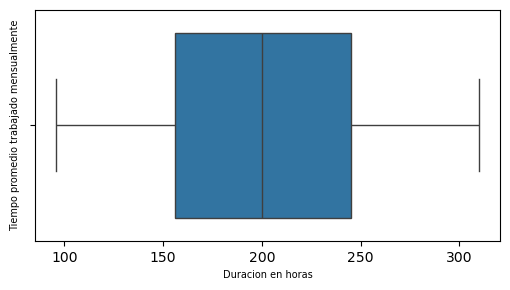

In [495]:
# Se utiliza un gráfico de cajas para visualizar la distribucion de la variable e identificar valores extremos.
fig, ax = plt.subplots(1,1,figsize=(6,3))
plt.xlabel('Duracion en horas', fontsize=7)
plt.ylabel('Tiempo promedio trabajado mensualmente', fontsize=7)
sns.boxplot(x=df['promedio_horas_mes'], showfliers=True, fliersize=2, ax=ax) # Se establece el argumento showfliers como True para mostrar valores extremos.
plt.show()

**Observaciones claves:**
- La distribución de la variable "promedio_hora_mes" no presenta valores extremos bajo el *método IQR* para detección de valores atípicos que usa la librería de *seaborn*. Por tanto, se confirma que esta variable no presenta valores atípicos.

#### Análisis de variable: **"tiempo_en_empresa"**

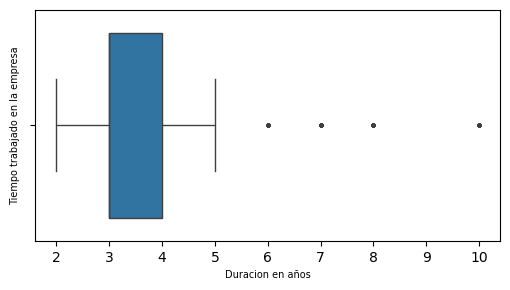

In [498]:
# Se utiliza un gráfico de cajas para visualizar la distribucion de la variable e identificar valores extremos.
fig, ax = plt.subplots(1,1,figsize=(6,3))
plt.xlabel('Duracion en años', fontsize=7)
plt.ylabel('Tiempo trabajado en la empresa', fontsize=7)
sns.boxplot(x=df['tiempo_en_empresa'], showfliers=True, fliersize=2, ax=ax) # Se establece el argumento showfliers como True para mostrar valores extremos.
plt.show()

**Observaciones claves:**
- La distribución gráfica de la variable "tiempo_en_empresa" permite identificar que los valores de campos iguales a 6, 7, 8 y 10 son considerados como valores extremos bajo el *método IQR* de *seaborn*. Por tanto, se confirma que esta variable SI presenta valores extremos pero que dada la naturaleza de los datos es muy factible que existiesen trabajadores con más de 5 años de antiguedad dentro de la empresa, puesto que la entidad inició operaciones en el año 2012.

**Es necesario identificar cuantos y cuales son los registros con valores extremos en esta variables, con el objetivo de decidir como gestionarlos más adelante. Para ello, se utilizará el método IQR estándar con factor de escala: 1.5.**

In [501]:
# Se calcula el primer cuartil, equivalente al percentil 25
q1 = df['tiempo_en_empresa'].quantile(0.25)

# Se calcula el tercer cuartil, equivalente al percentil 75
q3 = df['tiempo_en_empresa'].quantile(0.75)

# Se halla el valor del rango intercuartil
iqr = q3 - q1

# Se establece el límite superior e inferior para el rango de valores no atípicos, tomando como base el modelo estadístico de 1.5*IQR de Seaborn
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr
print(f'El límite superior es: {limite_superior}')
print(f'El límite inferior es : {limite_inferior}')

# Se crea la máscara de filtrado de valores atípicos y se identifica el subconjunto de datos que no son son valores atípicos
outliers_mask = (df['tiempo_en_empresa'] > limite_superior) | (df['tiempo_en_empresa'] < limite_inferior)
df[~outliers_mask]

# Se calcula cuantos registros en el conjunto de datos contiene valores atípicos
print(f'Total de registros que contienen valores atípicos en la variable "tiempo_en_empresa": {outliers_mask.sum()}')
print(f' - Existen {(df['tiempo_en_empresa'] < limite_inferior).sum()} registros por debajo del límite inferior')
print(f' - Existen {(df['tiempo_en_empresa'] > limite_superior).sum()} registros por encima del límite superior')

El límite superior es: 5.5
El límite inferior es : 1.5
Total de registros que contienen valores atípicos en la variable "tiempo_en_empresa": 1282
 - Existen 0 registros por debajo del límite inferior
 - Existen 1282 registros por encima del límite superior


**Observaciones claves:**
- Existen 1,282 registros con valores atípicos en la variable "tiempo_en_empresa", los cuales representan el aproximadamente el 8.5% de la población de datos.

<div class="alert alert-block alert-info">
    <b>✅</b><b> A TENER EN CUENTA</b> 
</div>

 > Alguno de los algoritmos que se utilizarán más adelante para modelar los datos de manera estadística, son sensibles a los datos atípicos. Por tanto, en la etapa de construcción del modelo se gestionarán estas 1,282 observaciones de la manera más correcta según el ajuste al modelo específico.

# <b><div style='padding:13px;background-color:#592321;color:white;border-radius:3px;font-size:110%;text-align: left'>Tarea 4. Análisis de variables</div></b>

## Actividades:
- Identificar relaciones entre pares.
- Revisión de las relaciones entre variables.
- Análisis del balance/distribución de variables categóricas.
- Análisis del balance de clases de la variable objetivo (independiente).

## 4.1. Identificar relaciones entre pares

Se utilizará una matrix de pares para analizar la correlación entre cada par de variables posible. Esto permitirá identificar cuáles son las correlaciones que más aportan información para la generación de "Insights".

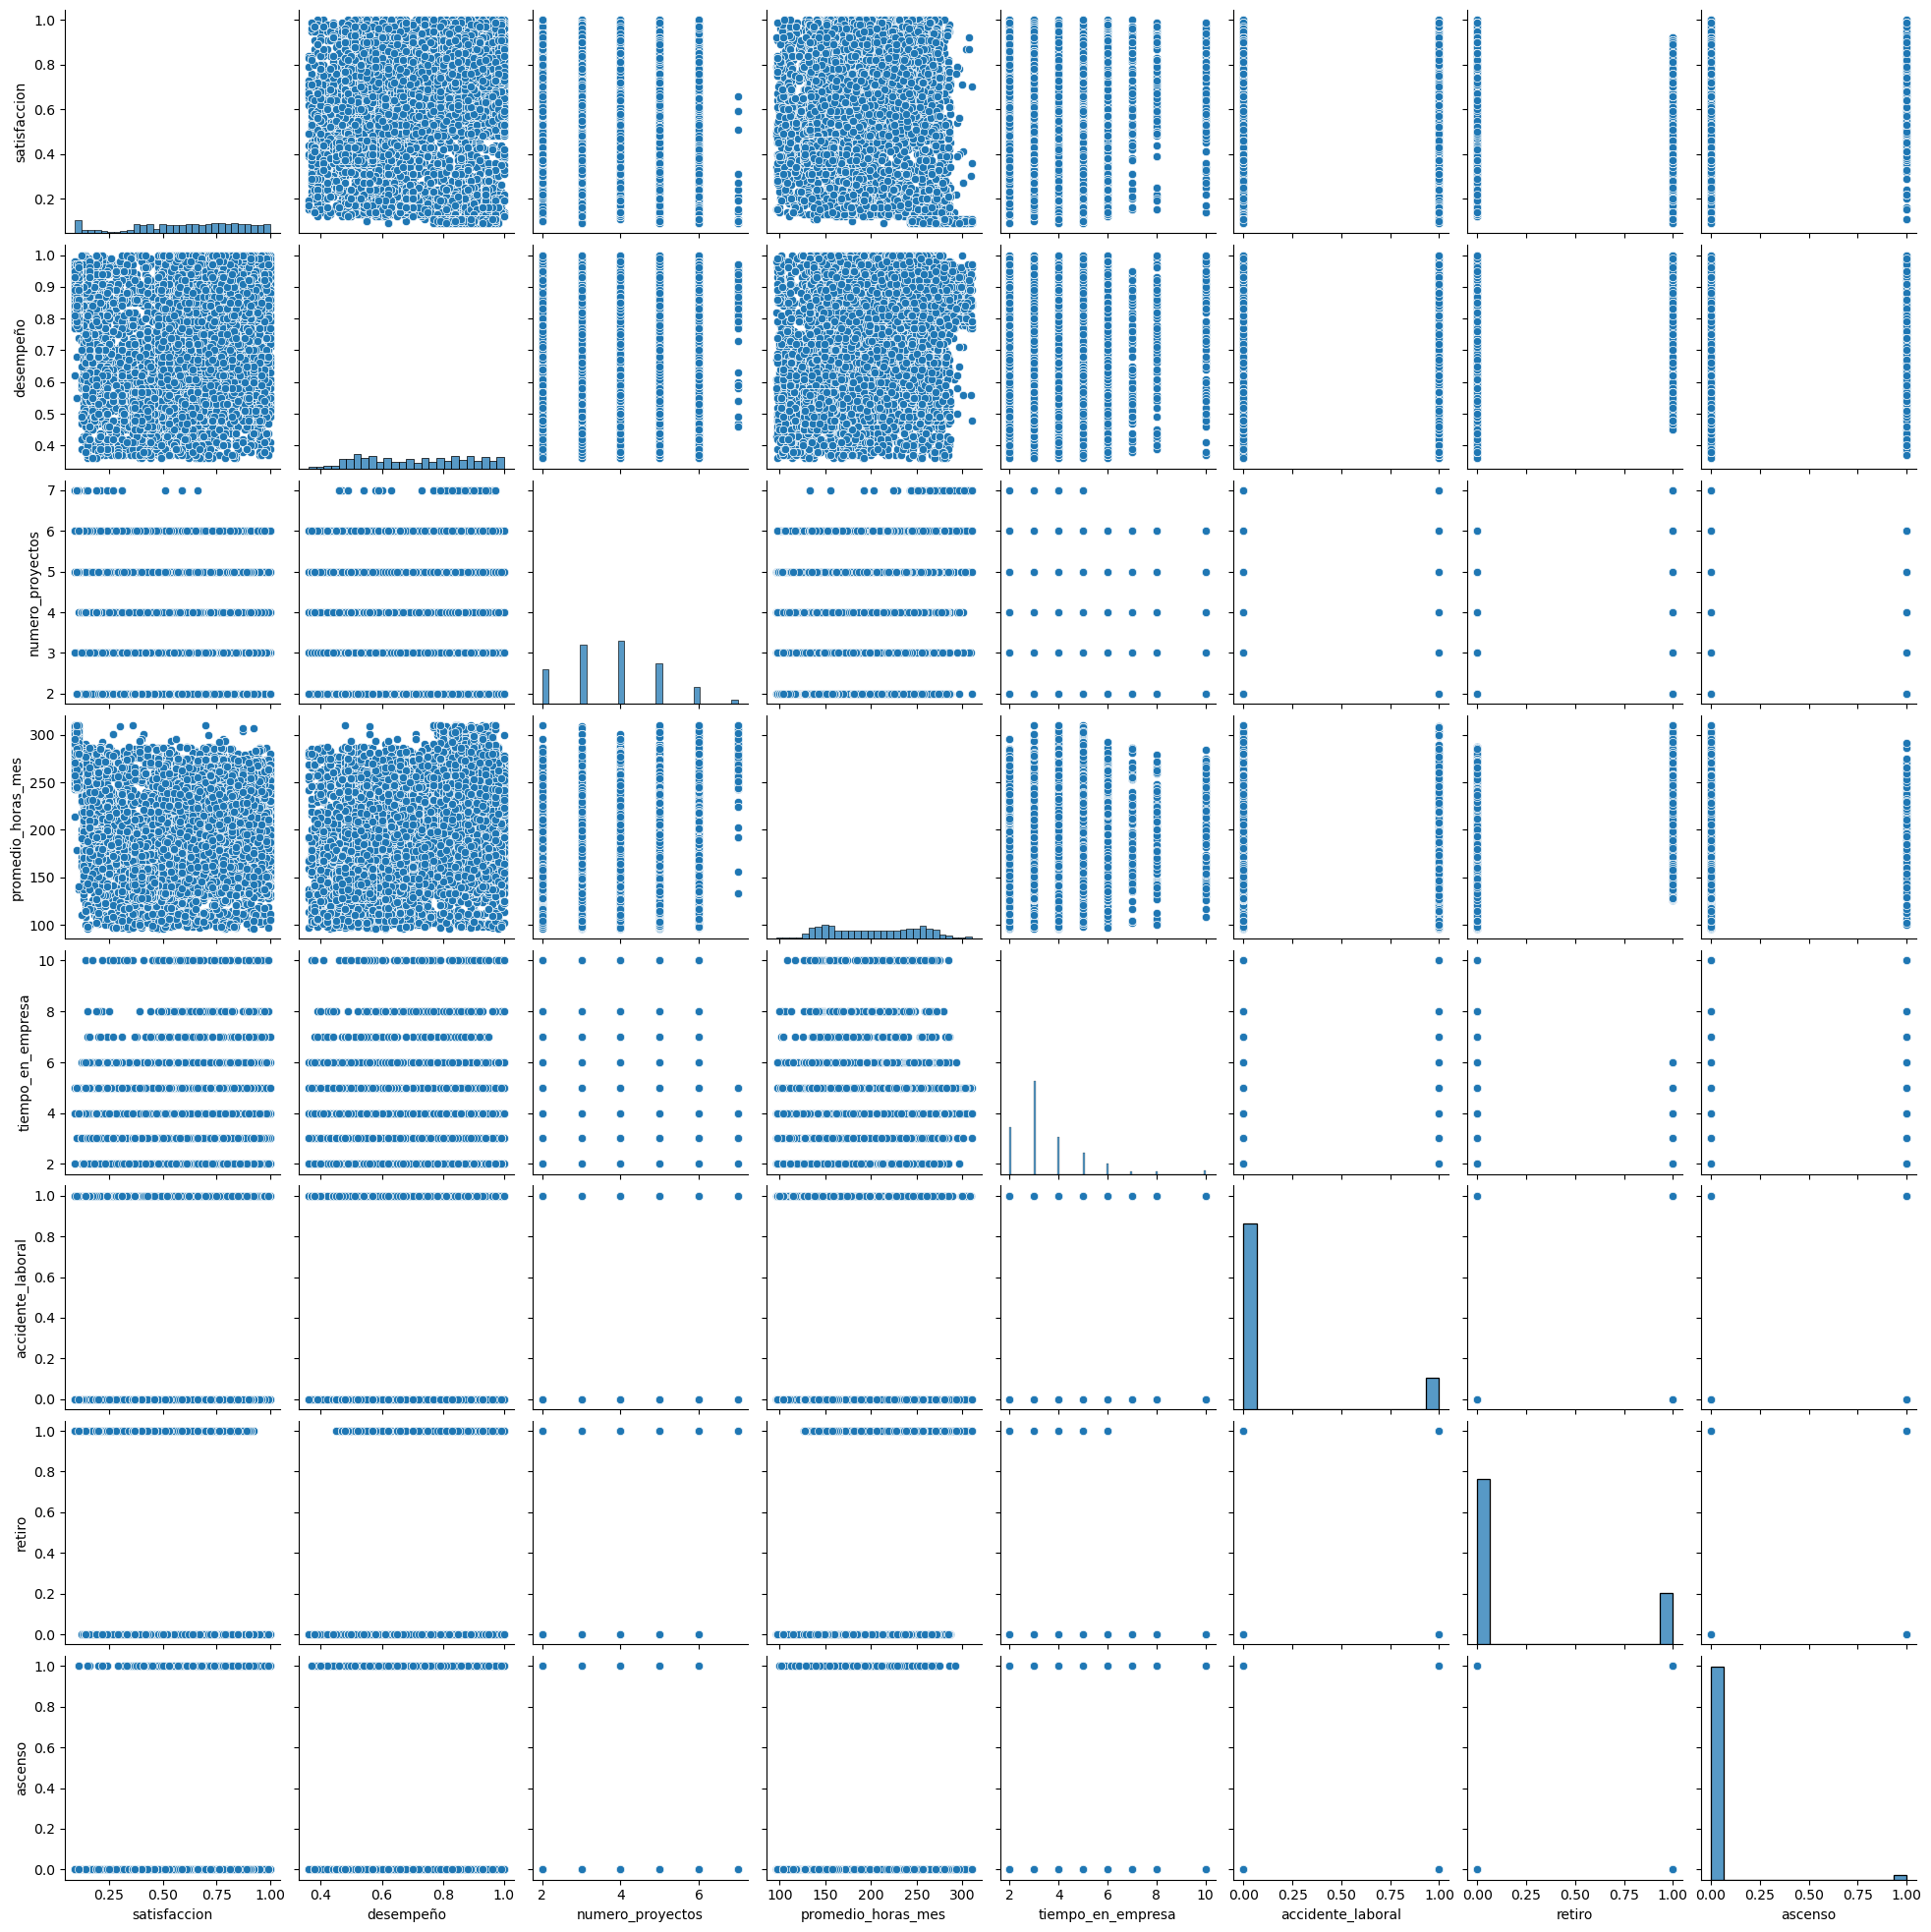

In [508]:
sns.pairplot(df)
plt.show()

**Observaciones claves:**
- La mayoría de las correlaciones explican dinámicas binarias que pueden ser ajustadas a un modelo de regresión logística u otro modelo de clasificación. Este hecho incluye también a la variable, "retiro", que es la que tomaremos como variable dependiente para la construcción del modelo de "machine learning" más adelante.
- Es importante analizar más a profundida la relación entre la variable "satisfaccion" y "tiempo_en_empresa", ya que en un primer acercamiento nos damos cuenta que existe, de manera global, poca variación en el rango de valores de la variable satisfacción, lo que podría no tener mucho sentido si se supone que esta variable sea una de las más importantes.
- Una relación también a examinar es la que se da entre la variable "promedio_horas_mes" y "numero_proyectos", ya que se observa un cambio abrupto del comportamiento de los puntos de datos cuando se supera los 6 proyectos trabajados.
- Otra relaciones importante a estudiar a más profundida es entre la variable "satisfaccion" y "promedio_horas_mes", y entre "satisfaccion" y "desempeño", puesto que se identifican algunas observaciones por debajo de la nube de puntos a medida que las variables "promedio_horas_mes" y "desempeño se acercan a sus valores máximos".
- La variable "tiempo_en_empresa" muestra también una relación interesante con la variables "desempeño", que no está de más revisar.
- De la anterior matriz de gráficos de pares no se identifica un comportamiento extraño de la variable "ascenso" en su relación con otra variable. Sin embargo se revisará que tanta relación existe entre esta y el número de proyectos trabajados.

<div class="alert alert-block alert-info">
    <b>✅</b><b> A TENER EN CUENTA</b> 
</div>

 > De manerá gráfica se pudo evidenciar que no existe multicolinealidad significativa entre las variables dependientes. Este hecho es importante a tener en cuenta ya que es uno de los supuestos del modelo de regresión logística que se utilizará más adelante como parte de los modelos a evaluar para el ajuste de datos.

## 4.2. Revisión de las relaciones entre variables

#### Análisis de la relación: **"tiempo_en_empresa" y "satisfaccion"** 

Se utiliza un ***gráfico de cajas*** que muestre la distribución de `tiempo_en_empresa` por el nivel de `satisfaccion`. De esta forma se compara la distribución de empleados que aún continuan dentro de la empresa con los que decidieron irse. Adicionalmente, se utiliza también un ***histograma*** que permita dar contexto al comportamiento de las variable, `tiempo_en_empresa`, posibilitando visualizar su distribución islada.

**Como se crearán varios escenarios usando la misma pareja de gráficos se define una función para automatizar el proceso y ahorrar tiempo.**

In [515]:
def boxplot_histplot_maker(df, x:str, y:str, hue:str, box_titulo:str, hist_titulo:str, hue_titulo:str, etiquetas:list):
    '''
    Argumentos:
    df (df_objecto): El dataframe sobre el cual se extraen las variables
    x (string): Variable acompañante
    y (string): Variable principal
    hue (string): Variable categórica
    box_titulo (string): Título del gráfico de cajas
    hist_titulo (string): Título del histograma
    hue_titulo (string): Título de la leyenda de clasificación categórica
    etiquetas (list): Lista con el nombre personalizado de las etiquetas de la variable categórica
    '''
    # Configuración del espacio de visualización
    fig, axes = plt.subplots(1, 2, figsize=(25, 6))

    # Creación del gráfico de cajas
    sns.boxplot(x=df[x], y=df[y], hue=df[hue], orient="h", palette="Set2", ax=axes[0], showfliers=False)
    handles, labels = axes[0].get_legend_handles_labels()
    new_labels = etiquetas
    axes[0].legend(handles=handles, labels=new_labels, title=hue_titulo)
    axes[0].invert_yaxis()
    axes[0].set_title(box_titulo)

    # Ajustar el rango del eje X del boxplot según los datos de 'x'
    axes[0].set_xlim(df[x].min() - 0.1, df[x].max() + 0.1)

    # Creación del histograma
    sns.histplot(x=df[y], hue=df[hue], shrink=5, multiple='dodge', palette="Set2", ax=axes[1])
    axes[1].legend(handles=handles, labels=new_labels, title=hue_titulo)
    axes[1].set_title(hist_titulo)

    # Ajustar el rango del eje X del histograma según los datos de 'y'
    axes[1].set_xlim(df[y].min() - 1, df[y].max() + 1)

    # Mostrar el entorno gráfico
    plt.show()

**Se procede a utilizar la función "boxplot_histplot_maker" creada para instanciar la visualización de las variables.**

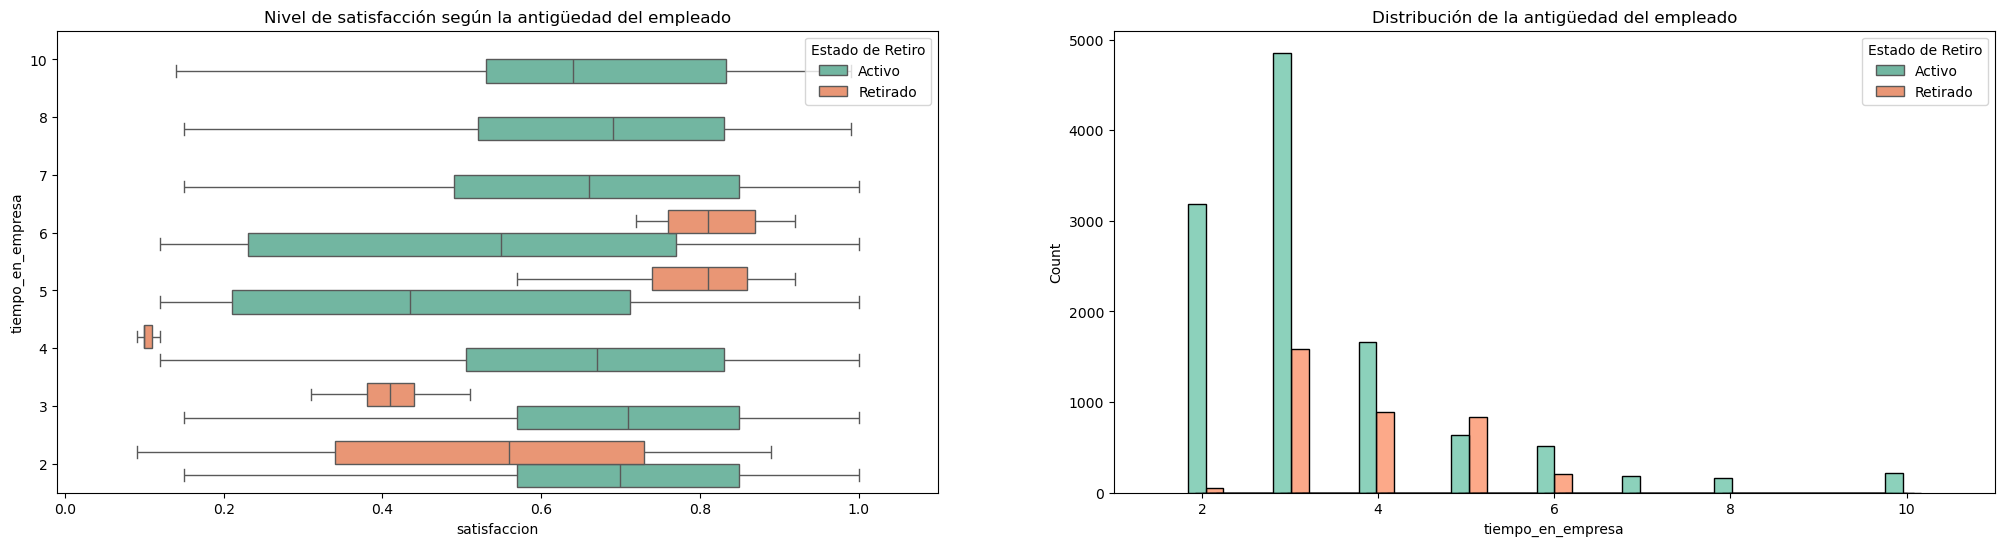

In [517]:
titulo_box = 'Nivel de satisfacción según la antigüedad del empleado' # Título del gráfico de cajas
titulo_hist = 'Distribución de la antigüedad del empleado' # Título del histograma
legenda_hue = 'Estado de Retiro' # Título de la leyenda
etiquetas = ['Activo', 'Retirado'] # Lista personalizada de las etiquetas categóricas
boxplot_histplot_maker(df, 'satisfaccion', 'tiempo_en_empresa', 'retiro', titulo_box, titulo_hist, legenda_hue, etiquetas) # Instancia de la función

**Observaciones claves:**
- Los empleados con mayor antigüedad no se han retirado del cargo en la empresa, y uno de los hechos cláve es que sus niveles de satisfacción son similares a los de los empleados más nuevos que decidieron continuar trabajando en la compañia.
- El histograma muestra que hay relativamente pocos empleados con más de 6 años antigüedad. Es interesante determinar, en análisis posteriores, que factores los llevarón a quedarse además de la satisfacción puntuada.
- Los empleados con cuatro años de antigüedad que se fueron parecen tener un nivel de satisfacción inusualmente bajo. Vale la pena investigar si hubo cambios en la política de la empresa que pudieran haber afectado específicamente a los empleados en este periodo de tiempo.
- Los empleados que se fueron en un periodo de tiempo corto, fue producto de un nivel de satisfacción bajo. Mientras que los empleados que alcanzaron a estar en un periodo de tiempo medio, reconocieron sentirse moderadamente satisfechos. Adicionalmente, ninguno de los colaboradores retirados estuvieron más de 6 años trabajando en la empresa, sin embargo, existen trabajadores activos con mucho más de 6 años, lo que lleva a asumir que el retiro puede deberse a otros factores adicionales.

#### Análisis de la relación: **"promedio_horas_mes" y "numero_proyectos"** 

**Se procede a utilizar la función "boxplot_histplot_maker" creada para instanciar la visualización de las variables.**

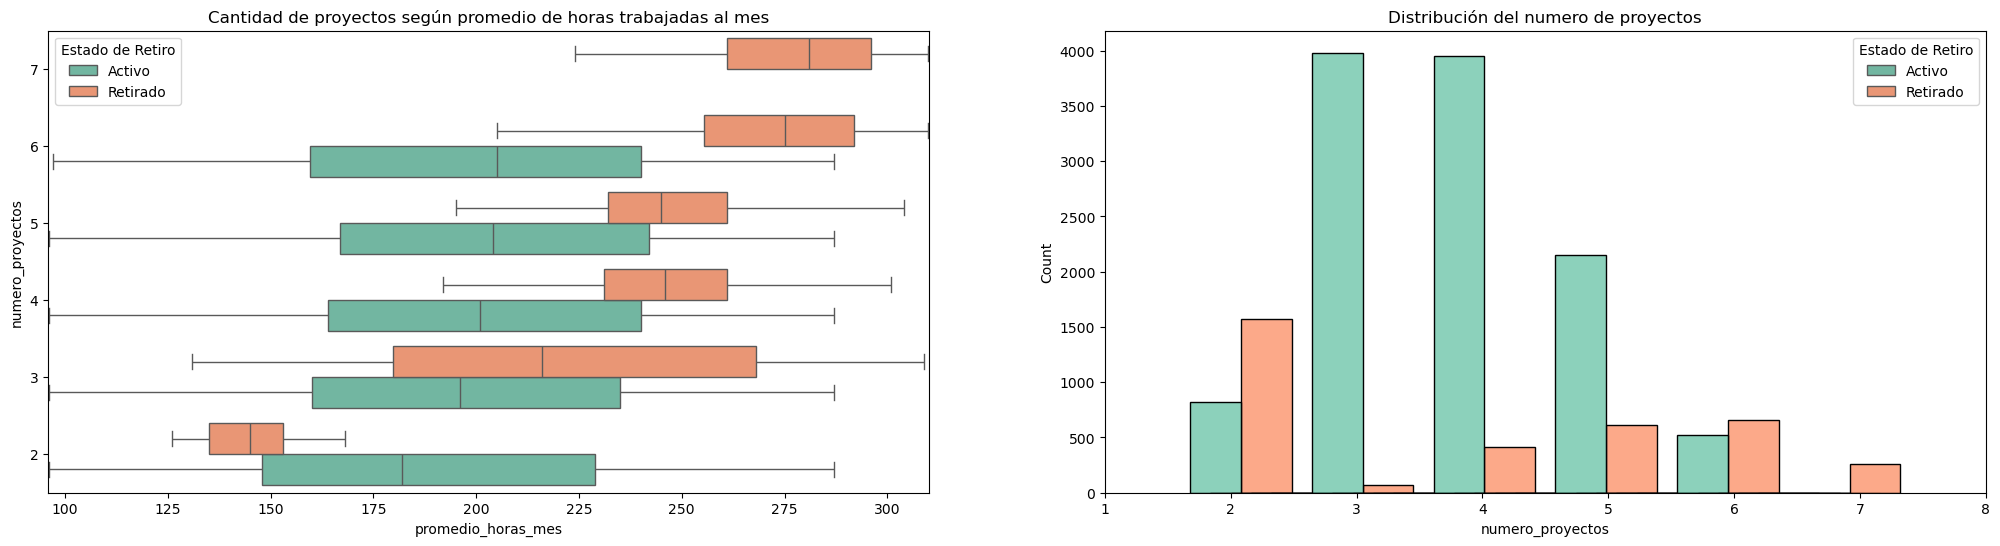

In [521]:
titulo_box = 'Cantidad de proyectos según promedio de horas trabajadas al mes' # Título del gráfico de cajas
titulo_hist = 'Distribución del numero de proyectos' # Título del histograma
legenda_hue = 'Estado de Retiro' # Título de la leyenda
etiquetas = ['Activo', 'Retirado'] # Lista personalizada de las etiquetas categóricas
boxplot_histplot_maker(df, 'promedio_horas_mes', 'numero_proyectos', 'retiro', titulo_box, titulo_hist, legenda_hue, etiquetas) # Instancia de la función

**Observaciones claves:**
- Todos los empleados que trabajaron en más de 6 proyectos se retiraron de su cargo en la empresa.
- El rango de horas trabajadas por los empleados que participaron en 6 y 7 proyectos fueron mucho mayores que el rango de horas trabajadas por los demás grupos. Esto puede ser uno de los factores determinantes a la hora de decidir abandonar la empresa.
- El número ideal de proyectos para que los empleados trabajen parece ser entre 3 y 4. La relación entre los que se quedaron y los que se fueron no es tan significativa para estos grupos.
- Hay dos grupos de empleados que dejaron la empresa: los que trabajaron considerablemente menos que sus compañeros con el mismo número de proyectos, y (grupo B) los que trabajaron mucho más que el promedio; lo que indica que posiblemente una de las razones de deserción esta asociado al nivel de participación y esfuerzo en los proyectos.
- Si se asumiese una jornada laboral de 46 horas por semana (para el año 2025) y dos semanas (15 dias) de vacaciones al año, el promedio de horas trabajadas por mes sería de 191.67 horas. Esto significa que, aparte de los empleados que trabajaron en dos proyectos, todos los demás grupos, incluso los que se quedaron, trabajaron muchas más horas que estos primeros.

<div class="alert alert-block alert-info">
    <b>💡</b><b> INSIGHT</b> 
</div>

 > Podría ser natural que las personas que trabajan en más proyectos también trabajen más horas. Parece que este es el caso aquí, ya que el promedio de horas de cada grupo (los que se quedaron y los que se fueron) aumenta conforme aumenta el número de proyectos trabajados. Sin embargo, se realizaron alguna sobservaciones importantes relacionadas con el sobre esfuerzo individual.
> 
>  Los empleados trabajan muchas más horas promedio de las que deberían legalmente por mes, lo que lleva a concluir que la sobrecarga de trabajo y la necesidad de hacer horas extras para ejecutar los proyectos, es un factor clave que puede contribuir al incremento de riesgos psicosociales.

#### Análisis de la relación: **"desempeño" y "satisfaccion"** 

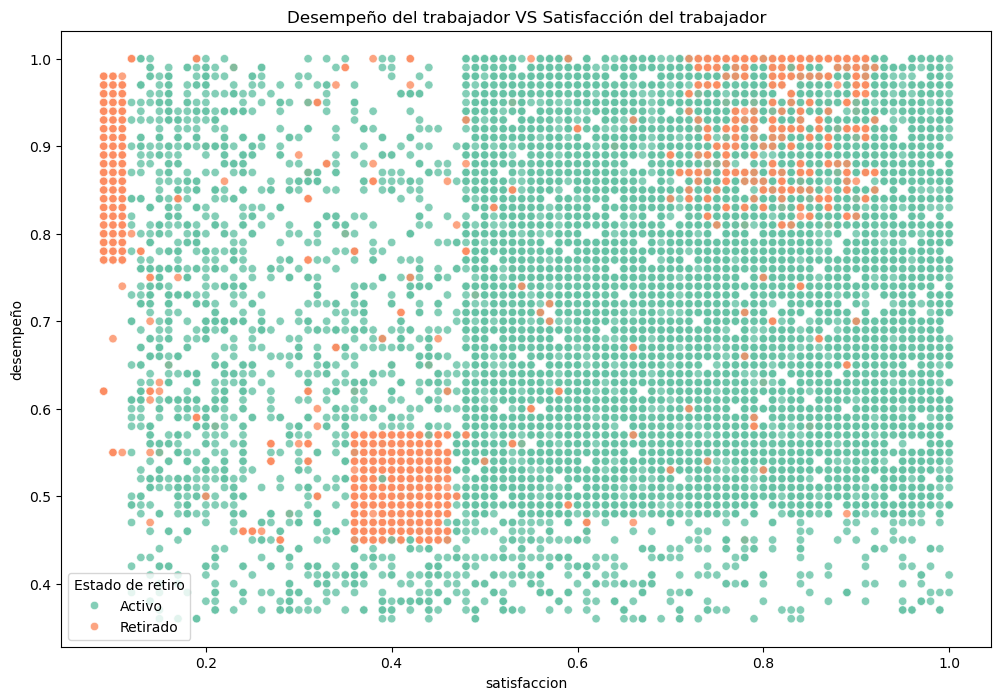

In [525]:
fig, axes = plt.subplots(1,1,figsize=(12,8))

# Crear el gráfico de dispersión
sns.scatterplot(x=df['satisfaccion'], y=df['desempeño'], hue=df['retiro'], alpha=0.8, palette='Set2', ax = axes)

# Obtener los handles y etiquetas de la leyenda para personalizarlas
handles, labels = axes.get_legend_handles_labels()
new_labels = labels=['Activo', 'Retirado']
axes.legend(handles=handles, labels=new_labels, title='Estado de retiro')

# Agregar el título del gráfico
plt.title('Desempeño del trabajador VS Satisfacción del trabajador')

# Mostrar el gráfico
plt.show()

**Observaciones claves:**
- Los trabajadores activos presentan un comportamiento bastante uniforme. No necesariamente su nivel de desempeño es resultado de un estado satisfactorio específico. No obstante, la mayoría de trabajadores en este grupo tienen una fuerte presencia en áreas de alta satisfacción y desempeño. Lo que pueden indicar que la empresa probablemente conserva empleados que muestran medio-alto niveles en ambas métricas.
- Hay una menor proporción de empleados activos con baja satisfacción, lo que podría ser un indicador de políticas para mejorar la satisfacción laboral o una tendencia natural a retener a empleados más satisfechos.
- En general, los empleados retirados están menos dispersos y más concentrados en tres áreas específicas:
  - Baja satisfacción y desempeño moderado-alto: Esto podría sugerir que empleados insatisfechos, incluso aquellos con buen desempeño, tienden a retirarse de la empresa.
  - Baja-media satisfacción y demempeño medio: Lo que puede indicar que algunos ex-trabajadores no lograron adecuarse bién a los desafíos y tareas de su cargo.
  - Alta satisfacción pero bajo desempeño: Esto sugiere que, aunque estén satisfechos, un bajo desempeño podría ser un factor que contribuya a su salida de la empresa.



<div class="alert alert-block alert-info">
    <b>💡</b><b> INSIGHT</b> 
</div>

 > Los empleados con alta satisfacción (valores cercanos a 1) parecen tener una amplia variabilidad en el desempeño, pero aquellos con bajas satisfacciones (valores cercanos a 0) suelen tener un desempeño más consistente en rangos moderados-altos. Esto sugiere que la satisfacción no siempre está correlacionada directamente con el desempeño.
>
> La empresa podría investigar las razones detrás de la salida de empleados con alta satisfacción pero bajo desempeño, para determinar si se puede hacer algo para mejorar su productividad antes de que decidan retirarse. Los empleados con baja satisfacción, especialmente aquellos con buen desempeño, podrían beneficiarse de intervenciones para mejorar su experiencia laboral y evitar que se retiren.

#### Análisis de la relación: **"promedio_horas_mes" y "satisfaccion"** 

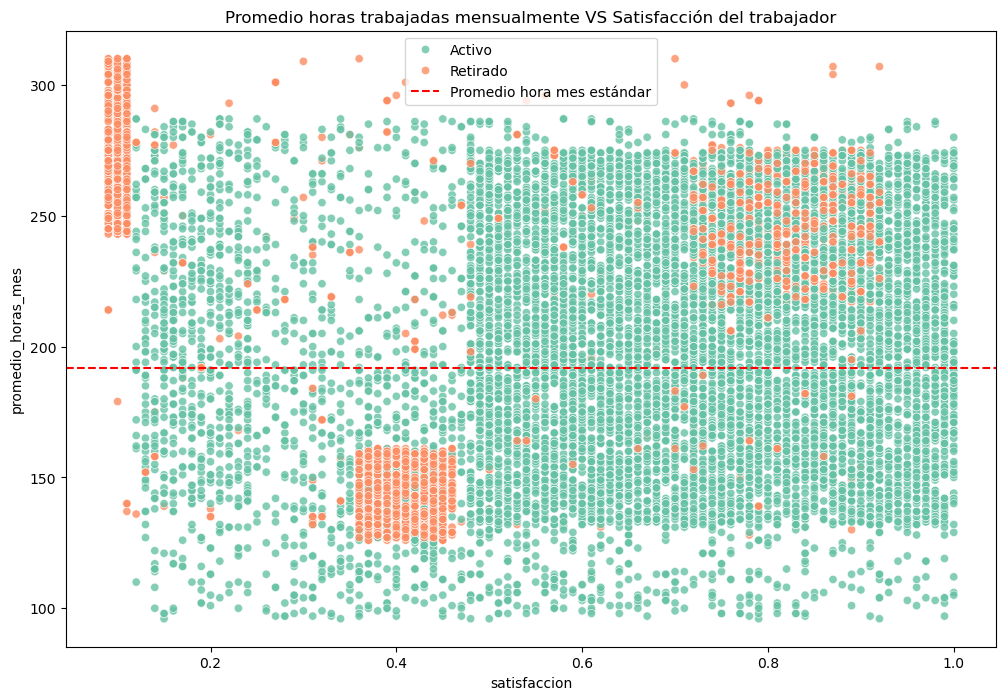

In [529]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))

# Crear el gráfico de dispersión
sns.scatterplot(x=df['satisfaccion'], y=df['promedio_horas_mes'], hue=df['retiro'], alpha=0.8, palette='Set2', ax=axes)

# Agregar la línea horizontal con etiqueta, que representa el promedio de horas mensuales legales
plt.axhline(y=191.67, color='red', ls='--', label='Promedio hora mes estándar')

# Obtener los handles y etiquetas de la leyenda para personalizarlas
handles, labels = axes.get_legend_handles_labels()
new_labels = ['Activo', 'Retirado'] + ['Promedio hora mes estándar']
axes.legend(handles=handles, labels=new_labels)

# Agregar el título del gráfico
plt.title('Promedio horas trabajadas mensualmente VS Satisfacción del trabajador')

# Mostrar el gráfico
plt.show()

**Observaciones claves:**
- La correlación entre estas dos variables es similar a la que experimenta la variable "satisfacción" con "desempeño", lo que podría supone una relación indirecta entre esta última y la variable "promedio_horas_mes". Es dececir que, el número de horas promedios trabajadas mensualmente podría llegar a ser relevante, en algunas situaciones, a la hora de evaluar la productividad de los empleados.
- Existen 3 grúpos de empleados que se destacan:
   - ***Alta carga de trabajo (promedio de horas > 200):***
     
     - Hay una concentración de empleados retirados en este rango, especialmente aquellos con niveles bajos de satisfacción (cerca de 0.1 o menos). Esto sugiere que trabajar más horas de las que deberían legalmente, está asociado con insatisfacción y una mayor probabilidad de retiro.
     - Incluso empleados con satisfacción moderada a alta en este rango parecen estar en riesgo de retiro, lo cual podría deberse al agotamiento físico o mental por exceso de trabajo.
     - Aunque hay empleados activos en este rango, tienden a mostrar niveles de satisfacción moderados o altos (mayores a 0.5). Esto indica que, si bien algunos toleran trabajar más horas que las legales, es más probable que se mantengan activos si están satisfechos.
       
   - ***Horas trabajadas legales (alrededor de 200, línea roja):***
 
       - Este grupo muestra una mayor densidad de empleados activos, con una amplia dispersión de niveles de satisfacción, desde baja hasta alta. Esto indica que mantenerse dentro del rango estándar es un factor estabilizador, pero la satisfacción sigue jugando un papel importante en la retención.
     - Aunque hay algunos empleados retirados dentro del rango de las horas legales, parecen estar concentrados principalmente en niveles bajos de satisfacción. Esto sugiere que, en este caso, el retiro está más relacionado con la insatisfacción que con el número de horas trabajadas.
       
   - ***Baja carga de trabajo (promedio de horas < 200):***
 
       - En este rango, hay una notable concentración de empleados retirados con baja satisfacción. Esto podría indicar que trabajar menos de las horas base establecidas por la ley en jornadas completas, puede generar problemas psicosociales como percepción de subutilización, falta de desarrollo profesional o incluso condiciones contractuales desfavorables.
     - También hay empleados retirados con alta satisfacción en este rango, lo que sugiere que otros factores externos (como jubilación anticipada o cambios personales) podrían estar influyendo en estas salidas.
     - Los empleados activos en este rango tienden a presentar satisfacción moderada a alta. Esto podría deberse a una mejor conciliación entre la vida laboral y personal en condiciones de menor carga laboral.

<div class="alert alert-block alert-info">
    <b>💡</b><b> INSIGHT</b> 
</div>

 > - Los empleados que trabajan fuera del rango legal (tanto por exceso como por defecto) parecen estar en mayor riesgo de retiro, especialmente cuando tienen baja satisfacción. Cumplir con la jornada de trabajo estándar según la ley Colombiana puede ser un factor estabilizador para los empleados, pero la satisfacción laboral es el componente más determinante para evitar retiros.
> 
> - Empleados con horarios extremos (mucho más o mucho menos de 200 horas) tienen un mayor riesgo de insatisfacción y retiro, especialmente si sus expectativas no están siendo satisfechas. La empresa debería centrarse en garantizar cargas laborales equilibradas y políticas que fomenten la satisfacción para retener a sus empleados.

#### Análisis de la relación: **"tiempo_en_empresa" y "desempeño"** 

**Se procede a utilizar la función "boxplot_histplot_maker" creada para instanciar la visualización de las variables.**

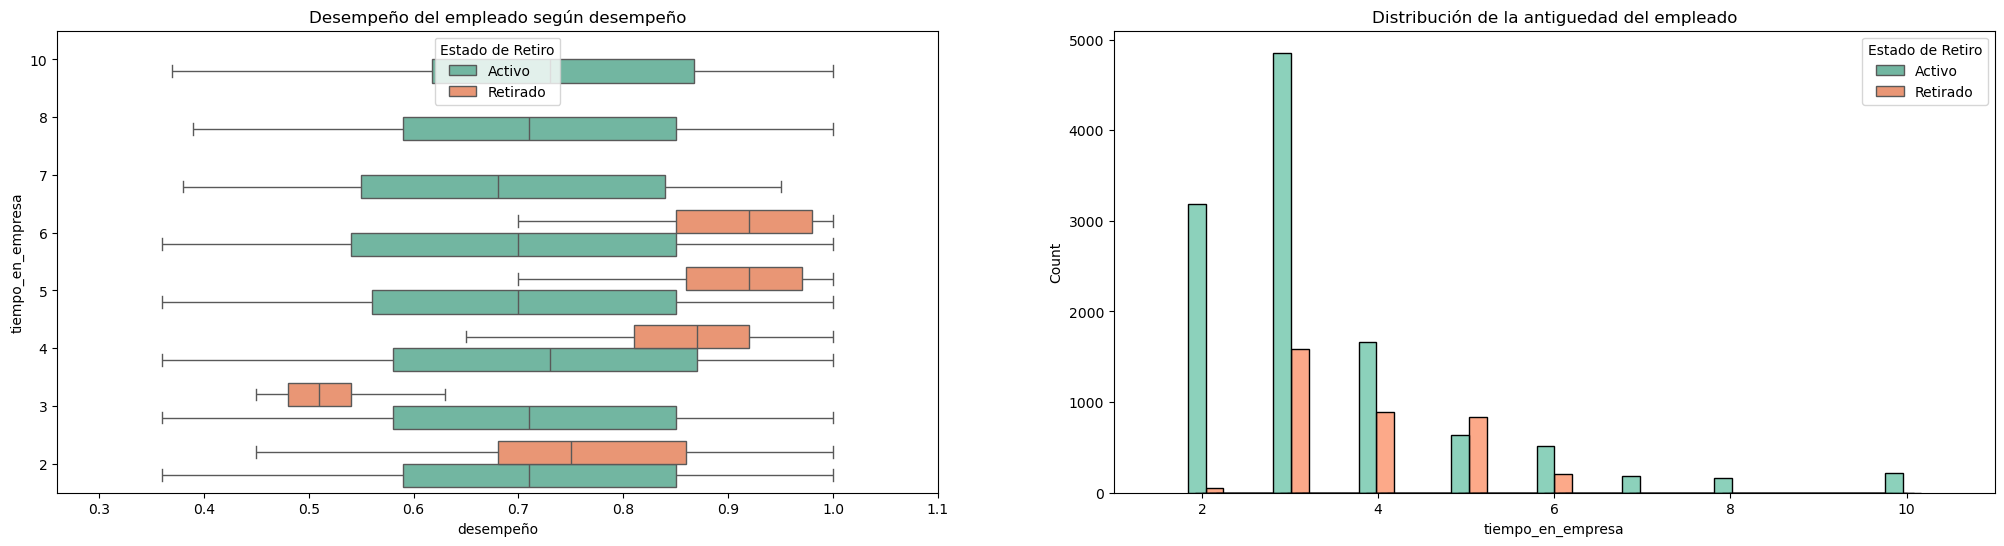

In [534]:
titulo_box = 'Desempeño del empleado según desempeño' # Título del gráfico de cajas
titulo_hist = 'Distribución de la antiguedad del empleado' # Título del histograma
legenda_hue = 'Estado de Retiro' # Título de la leyenda
etiquetas = ['Activo', 'Retirado'] # Lista personalizada de las etiquetas categóricas
boxplot_histplot_maker(df, 'desempeño', 'tiempo_en_empresa', 'retiro', titulo_box, titulo_hist, legenda_hue, etiquetas) # Instancia de la función

**Observaciones claves:**
   - ***Grupo de empleados activos:***
     - El desempeño entre este grupo tiende a ser consistente y moderado-alto (valores cercanos a 0.7 o más) en casi todos los años de antigüedad.
     - Los empleados con mayor antigüedad (5+ años) presentan un rango más amplio de desempeño, pero la mediana suele mantenerse en niveles altos.
   - ***Grupo de empleados retirados:***
     - Los empleados retirados tienden a concentrarse en niveles altos de desempeño (≥ 0.7), especialmente en los rangos de antigüedad de 4 a 6 años.
     - Se observa inexistencia de empleados retirados en los valores superiores extremos de la variable "tiempo_en_empresa", es decir, más de 6 años.
     - La mayoría de los empleados retirados se encontraban en el rango de antigüedad de 3 a 5 años, y presentaron un desempeño relativamente alto. Esto podría indicar que algunos empleados de buen desempeño se retiran temprano, posiblemente debido a oportunidades externas o insatisfacción en otros aspectos (salarios, beneficios, ambiente laboral).
     - Aunque hay empleados retirados que tenían mas 5 años en la empresa, es menos común. La estabilidad parece aumentar en este grupo, ya que los empleados activos dominan.
   - ***Otras observaciones:***
     - La mayoría de los empleados activos tienen 2 a 3 años de antigüedad, lo que indica que este es el rango más común para los trabajadores actuales.
     - La mayoría de los empleados retirados tenían antigüedades entre 3 y 5 años de, lo que podría surgerior que este es un rango donde las personas tienden a dejar la empresa.
     - Hay una cantidad significativa de empleados retirados con 2 o 3 años de antigüedad, lo que refuerza la idea de que este rango es un punto crítico para el retiro.
     - Hay una disminución gradual en la cantidad de empleados activos a medida que aumenta la antigüedad. Esto es esperado, ya que la retención a largo plazo suele ser más difícil.
     - Es menos común que empleados con menos de 2 años o más de 5 años se retiren.

<div class="alert alert-block alert-info">
    <b>💡</b><b> INSIGHT</b> 
</div>

 > La antigüedad en la empresa tiene un impacto significativo en el retiro de los empleados. Los primeros años, especialmente entre 3 y 5 años, representan un período crítico donde se concentran muchos retiros, incluso de empleados con buen desempeño. Retener a estos empleados podría ser clave para mejorar la estabilidad del talento en la empresa y asegurar una fuerza laboral más productiva a largo plazo.

#### Análisis de la relación: **"numero_proyectos" y "ascenso"** 

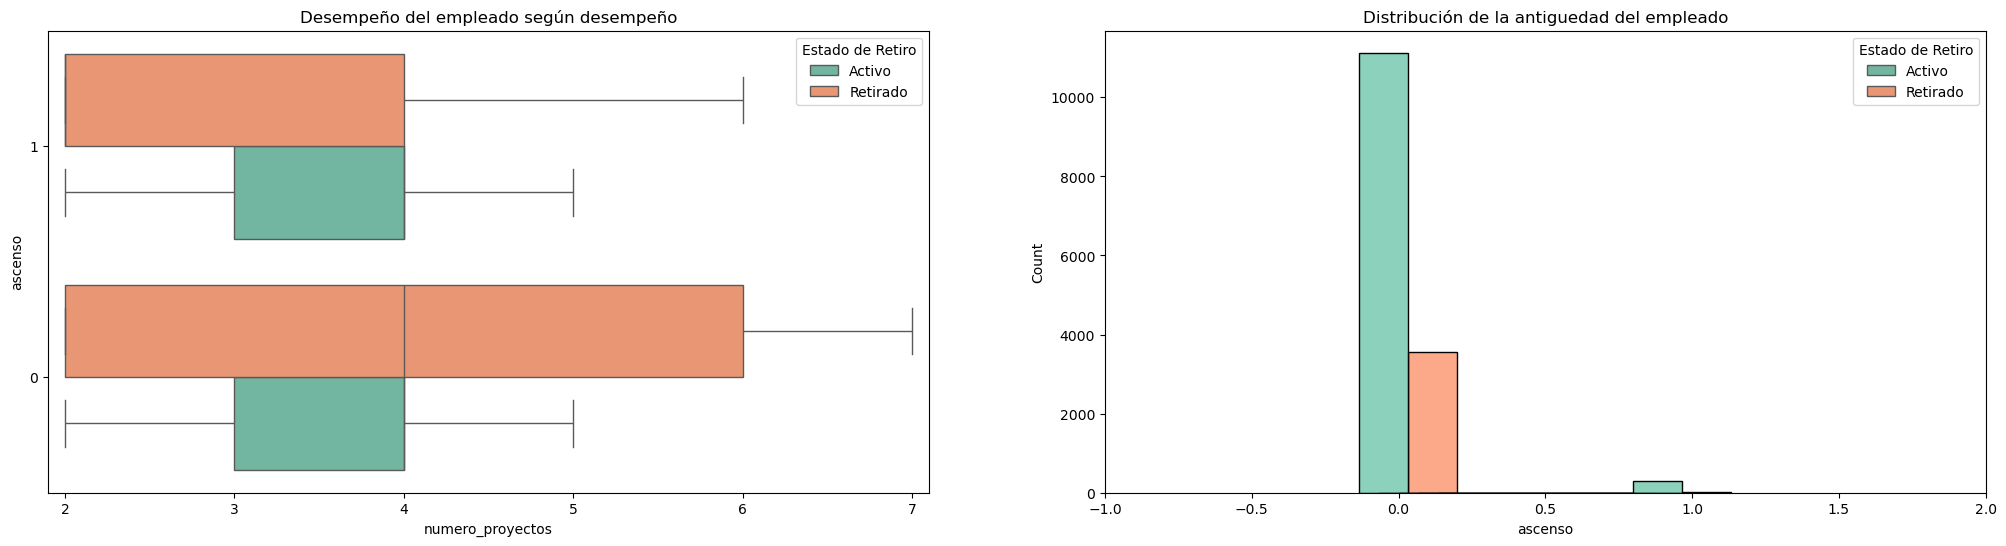

In [538]:
titulo_box = 'Desempeño del empleado según desempeño' # Título del gráfico de cajas
titulo_hist = 'Distribución de la antiguedad del empleado' # Título del histograma
legenda_hue = 'Estado de Retiro' # Título de la leyenda
etiquetas = ['Activo', 'Retirado'] # Lista personalizada de las etiquetas categóricas
boxplot_histplot_maker(df, 'numero_proyectos', 'ascenso', 'retiro', titulo_box, titulo_hist, legenda_hue, etiquetas) # Instancia de la función

**Observaciones claves:**
   - ***Grupo de empleados que no recibieron ascenso:***
     - Los empleados que no recibieron ascenso (ascenso = 0) tienden a tener un rango más amplio en el número de proyectos en los que participaron. Sin embargo, la mediana está en torno a 4 proyectos.
     - Entre los empleados que no recibieron ascenso, los retirados participaron en más proyectos (distribución desplazada hacia valores mayores) en comparación con los empleados activos.
   - ***Grupo de empleados que recibieron ascenso:***
     - Los empleados que sí recibieron ascenso (ascenso = 1) parecen haber participado en menos proyectos en promedio, con una mediana alrededor de 3 proyectos.
     - Entre los empleados que sí recibieron ascenso, hay una ligera tendencia de que los empleados activos participaron en menos proyectos que los retirados.
   - ***Otras observaciones:***
     - La mayoría de los empleados (tanto activos como retirados) no han recibido una promoción (ascenso = 0).
     - Entre los empleados que sí recibieron una promoción (ascenso = 1), hay una clara predominancia de empleados activos. Esto sugiere que recibir una promoción está correlacionado con una mayor probabilidad de continuar trabajando en la empresa. Los empleados retirados con ascenso son muy pocos, lo que refuerza la idea de que los empleados promovidos tienden a permanecer más tiempo en la empresa.
     - Entre los empleados que sí recibieron una promoción (ascenso = 1), hay una clara predominancia de empleados activos. Esto sugiere que recibir una promoción está correlacionado con una mayor probabilidad de continuar trabajando en la empresa.

<div class="alert alert-block alert-info">
    <b>💡</b><b> INSIGHT</b> 
</div>

 > - Los empleados que no reciben promoción parecen participar en un mayor número de proyectos en promedio, pero también tienen una mayor probabilidad de retirarse.
>
 > - Los empleados promovidos tienen una mayor probabilidad de seguir activos en la empresa, lo que podría indicar que las promociones están asociadas con la retención del talento.
>
 > - Podría deducirse que participar en un número elevado de proyectos no necesariamente asegura una promoción.

## 4.3. Análisis del balance/distribución de variables categóricas

In [542]:
df.head()

,satisfaccion,desempeño,numero_proyectos,promedio_horas_mes,tiempo_en_empresa,accidente_laboral,retiro,ascenso,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,ventas,bajo
1,0.80,0.86,5,262,6,0,1,0,ventas,medio
2,0.11,0.88,7,272,4,0,1,0,ventas,medio
3,0.72,0.87,5,223,5,0,1,0,ventas,bajo
4,0.37,0.52,2,159,3,0,1,0,ventas,bajo


#### Distribución de la variable **"departamento"**

Se revisa el balance de las clases de esta variable para analizar como se ha distribuido el históricos de empleados en las áreas de trabajo de la empresa según el estado de retiro de los empleados.

In [545]:
distribucion_departamento = df[['departamento','retiro']].value_counts(normalize=True).reset_index()
distribucion_departamento['proportion'] = distribucion_departamento['proportion']*100
distribucion_departamento

,departamento,retiro,proportion
0,ventas,0,20.841389
1,operaciones,0,13.487566
2,mantenimiento,0,11.160744
3,ventas,1,6.760451
4,sistemas,0,6.360424
5,calidad,0,4.693646
6,operaciones,1,4.646976
7,i+d,0,4.440296
8,publicidad,0,4.366958
9,finanzas,0,3.753584


Se genera un gráfico de barras que muestre la distribución porcentual de empleados en distintos departamentos, desglosados por estado (activo o retirado). Esto permite identificar patrones de permanencia o retiro según el área de trabajo.

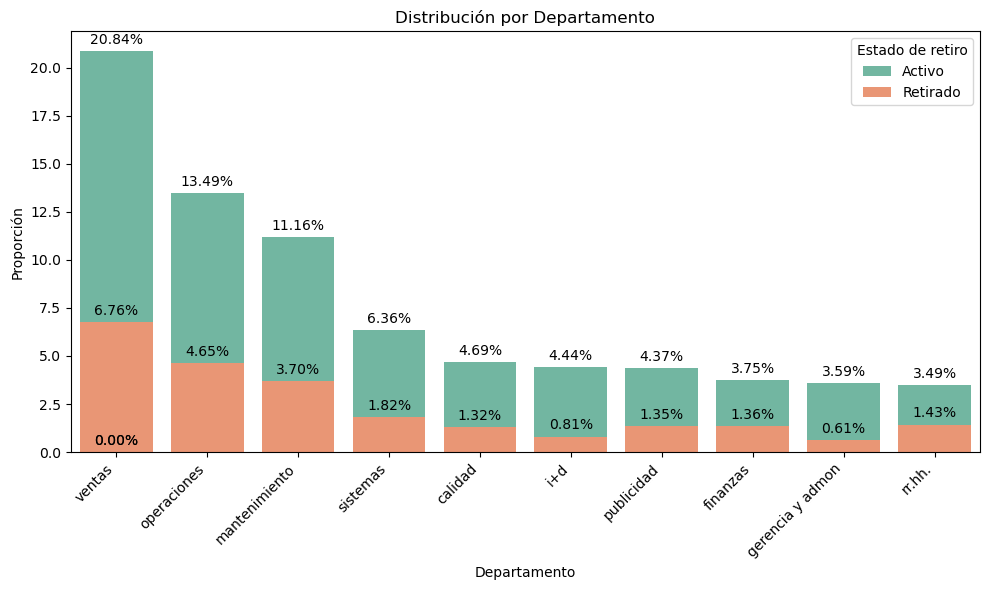

In [547]:
fig, axes = plt.subplots(1,1, figsize=(10, 6))

# Crear el gráfico de barras
ax = sns.barplot(x='departamento', y='proportion', hue = 'retiro',data=distribucion_departamento, palette='Set2', dodge=False,legend=True)

# Agregar las etiquetas de los valores sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Obtener los handles y etiquetas de la leyenda para personalizarlas
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Activo', 'Retirado']
ax.legend(handles=handles, labels=new_labels, title='Estado de retiro')

# Personalización
plt.title('Distribución por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Proporción')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Observaciones claves:**
   - Ventas es el área con mayor proporción de empleados activos (20.84%) pero también con el mayor número de retirados (0%).
Esto es un comportamiento esperado puesto que es el departamento de mayor tamaño, y por tanto, más sensible a la rotación de personal.
   - El departamento de Operaciones y Mantenimiento tienen una proporción significativa de empleados retirados, teniendo presente que la cantidad de trabajadores en estas áreas son muy inferior a las de Ventas. Esto sugiere que son áreas donde el retiro es significativo, aunque la mayoría de los empleados aún permanecen activos.
   - La proporción de empleados activos (6.36%) en el departamento de Sistemas es notablemente mayor que la de empleados retirados (1.82%).
Aunque el área muestra un nivel bajo de estabilidad dado su tamaño, la proporción entre empleados activos y retirados es mucho más pequeña.
   - El resto de Departamentos (Calidad, I+D, Publicidad, Finanzas, Gerencia & Admon, RR.HH,) tienen menores cantidad de empleados retirados, sin embargo, la proporción entre empleados activos y retirados es muy pequeña en algunos casos, lo que conduce a pensar que son áreas con tendencia a inestabilidad en el largo plazo.

<div class="alert alert-block alert-info">
    <b>💡</b><b> INSIGHT</b> 
</div>

 > El gráfico refleja cómo la distribución de empleados activos y retirados varía considerablemente según el departamento. La tendencía hallada es que a medida que el tamaño del departamento disminuye, la propoción entre empleados activos y retirados también tiende a disminuir en la mayoría de los casos. Sin embargo, desde una vista global, las áreas con mayores trabajadores activos son también de donde proceden la cantidad de retiros más numerosos.

#### Distribución de la variable **"salario"**

Se revisa el balance de las clases de esta variable para analizar como se ha distribuido el salario de los empleados según el estado de retiro de cada uno. 

NOTA: El salario es codificado internamento por la empresa en una escala ordinal que comprende las clases: bajo, medio y alto, para efectos del presente análisis; con el objetivo de mantener confidencial detalles de la piramide y estrategia saralial.

In [552]:
distribucion_salario = df[['salario','retiro']].value_counts(normalize=True).reset_index()
distribucion_salario['proportion'] = distribucion_salario['proportion']*100
distribucion_salario

,salario,retiro,proportion
0,bajo,0,34.295620
1,medio,0,34.195613
2,bajo,1,14.480965
3,medio,1,8.780585
4,alto,0,7.700513
5,alto,1,0.546703


Se genera un gráfico que muestre la distribución porcentual de empleados según tres niveles salariales: bajo, medio y alto. Además, desglosa la proporción entre empleados activos y retirados.

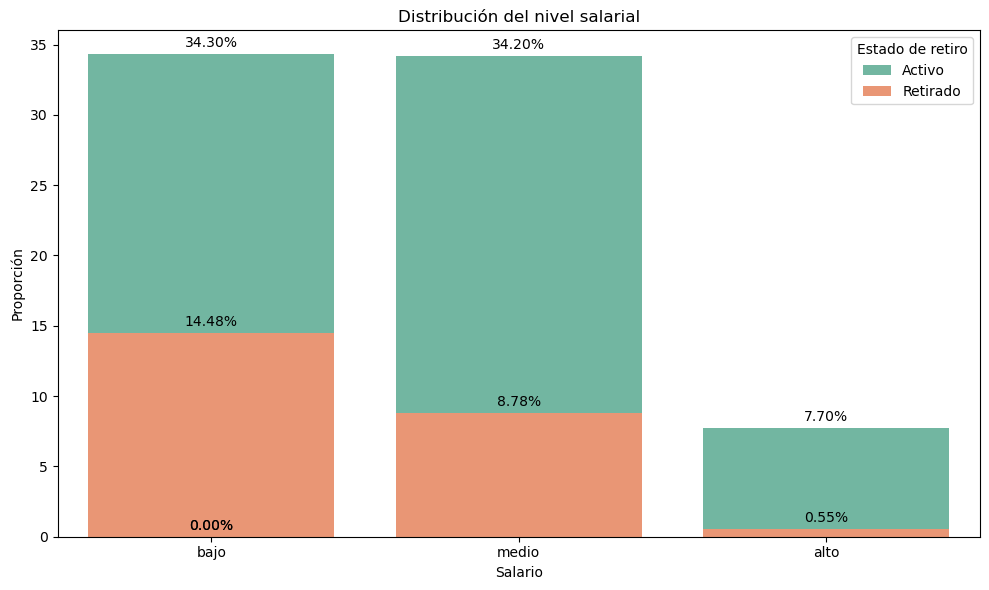

In [554]:
fig, axes = plt.subplots(1,1, figsize=(10, 6))

# Crear el gráfico de barras
ax = sns.barplot(x='salario', y='proportion', hue = 'retiro',data=distribucion_salario, palette='Set2', dodge=False,legend=True)

# Agregar las etiquetas de los valores sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Obtener los handles y etiquetas de la leyenda para personalizarlas
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Activo', 'Retirado']
ax.legend(handles=handles, labels=new_labels, title='Estado de retiro')

# Personalización
plt.title('Distribución del nivel salarial')
plt.xlabel('Salario')
plt.ylabel('Proporción')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Observaciones claves:**
   - ***Grupo de empleados con salario bajo:***
     - Este grupo tiene la mayor proporción de empleados activos (34.30%), con una cantidad significativa de empleados retirados (14.48%).
Es evidente que este nivel salarial está asociado a una mayor tasa de retiro en comparación con los otros niveles. Esto podría deberse a insatisfacción laboral, búsqueda de mejores oportunidades o menor compromiso debido al bajo salario.
   - ***Grupo de empleados con salario medio::***
     - Representa el segundo grupo más grande (34.20%), pero con una menor proporción de empleados retirados (8.78%) en comparación con el salario bajo. Esto sugiere que un salario medio contribuye más fuertemente a una mayor retención de empleados que un salario categorizado como bajo, ya que la mayoría se encuentra activa.
   - ***Grupo de empleados con salario alto***
     - Es el grupo con menor proporción de empleados (7.70%), y casi todos están activos (0.55% retirados). Este nivel salarial está claramente relacionado con una alta estabilidad laboral, lo que podría reflejar que los empleados con salarios altos están más comprometidos o satisfechos con sus condiciones laborales, que parece ser liderada fuertemente por la retribución económica.

<div class="alert alert-block alert-info">
    <b>💡</b><b> INSIGHT</b> 
</div>

 > El nivel salarial tiene un impacto directo en el estado de retiro de los empleados. Aquellos con salarios bajos tienen una mayor tendencia a retirarse, mientras que los empleados con salarios altos tienden a permanecer en la empresa. Esto sugiere que una estrategia para reducir la rotación podría incluir ajustes salariales en los niveles más bajos y medios, así como otros beneficios que aumenten la satisfacción laboral.

## 4.4. Análisis del balance de clases de la variable objetivo (independiente)

El objetivo de construir, más adelante, un modelo predictivo en el contexto de este proyecto, es predecir si un empleado potencialmente se retirará de la empresa, lo cual es una variable de resultado categórica. Por lo tanto, esta tarea implica clasificación. Más específicamente, se trata de una clasificación binaria, donde el resultado puede ser 1 (indicando que el empleado dejó la empresa) o 0 (indicando que el empleado no dejó la empresa).

Los algoritmos que se utilizará más adelante para ajustes de modelos estadísticos requieren que la variable dependiente no contenga clases extremadamente desbalanceadas, por lo que es importante examinarla en este punto antes de seguir con la construcción de modelos.

#### Revisión de balance de clases para variable **"retiro"**

In [560]:
df['retiro'].value_counts(normalize=True)

retiro
0    0.761917
1    0.238083
Name: proportion, dtype: float64

**Observaciones claves:**
 - Las clases de la variable dependiente se encuentran desbalanceadas pero no es extremadamente grave (ya que la clase minoritaria representa un 23.8% de los datos), pero podría justificar alguna técnica para mejorar el rendimiento del modelo, según el tipo, en la clase minoritaria. Por el momento no se realizará nigún resampleo para el ajuste de balance de clases, sin embargo, se estratificará esta variable en los modelos que lo requieran.
 - En caso de encontrar que alguno(s) de los modelos no predicen lo suficientemente bien la clase 1 = Retirado, se considerará aplicar una técnica de resampleo en su momento.

# <b><div style='padding:13px;background-color:#592321;color:white;border-radius:3px;font-size:110%;text-align: left'>Tarea 5. Codificación de variables categóricas</div></b>

## Actividades:
- Codificar numéricamente las variables categóricas

## 5.1. Codificación de variables

Este proceso facilita la preparación de datos categóricos para modelos de machine learning que no pueden manejar directamente variables de texto o categóricas.

#### Copia del dataframe original

In [567]:
# Se crea una copia del dataframe original para mantener intacta la integridad del mismo en caso de requerir hacer validaciones de datos
df_encoded = df.copy()

#### Codificación de la variable **"salario"**

`salario` es una variable categórica pero del tipo ordinal, es decir, sus clases tienen una jerarquía específica; así que en vez de utilizar herramientas de preproceso así que se realiza la asignación númerica ordenada de manera manual en el rango de 0&ndash;2.

In [570]:
df_encoded['salario'] = (df_encoded['salario'].astype('category').cat.set_categories(['bajo', 'medio', 'alto']).cat.codes)

#### Codificación de la variable **"departamento"**

`departmento` es una variable categórica simple que no sigue orden alguno, por tanto, se puede utilizar algunas de las herramientas de procesado como "get_dummies" de pandas o "OneHotEncoder" de sklearn para codificarlas. 

In [573]:
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

#### Revisión del dataframe final

In [575]:
df_encoded.head()

,satisfaccion,desempeño,numero_proyectos,promedio_horas_mes,tiempo_en_empresa,accidente_laboral,retiro,ascenso,salario,departamento_finanzas,departamento_gerencia y admon,departamento_i+d,departamento_mantenimiento,departamento_operaciones,departamento_publicidad,departamento_rr.hh.,departamento_sistemas,departamento_ventas
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,False,True
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,False,True
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,False,True


El proceso de codificación se realizó correctamente.

## 4.5. Matriz de correlaciones

Se crea una matriz de correlación para identificar numpericamente las relaciones entre variables y detectar posibles multicolinealidades, lo cual es importante cuando se están construyendo algunos modelos predictivos sensibles. Adicionalmente, permitirá observar de manera mucho más clara qué variables están fuertemente relacionadas y cuáles no tienen ninguna relación significativa.

#### Calculo de las correlaciones entre variables

Se excluyen las columnas "ficticas" o "dummies" de la variable departamento, del cálculo de correlaciones.

In [581]:
corr_matrix = df_encoded[['satisfaccion','desempeño','numero_proyectos','promedio_horas_mes','tiempo_en_empresa',
                         'accidente_laboral','retiro','ascenso','salario']].corr(method='pearson')

#### Gráfico de la matriz de correlaciones

Se utiliza un mapa de calor para visualizar más facilmente la matriz de correlaciones

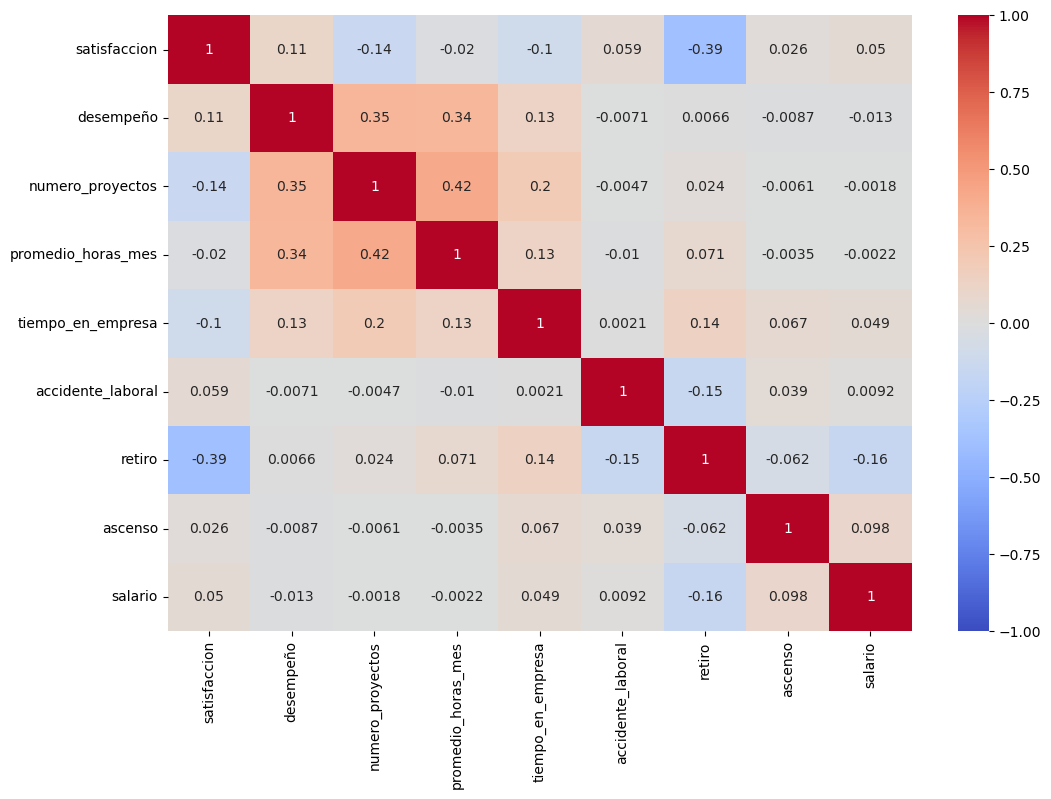

In [584]:
fig, axes = plt.subplots(1,1, figsize=(12, 8))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1 ,annot=True, cmap='coolwarm')
plt.show()

**Observaciones claves:**
 - El análisis de la matriz de correlación muestra que existe una relación positiva entre el número de proyectos en el que partició el empleado, las horas promedios trabajadas al mes y su evaluación de desempeño; estas correlaciones son las más significativas sin llegar a la extrema colinealidad. También es interesante evidencia que existe una relación inversa entre el retiro de empleados y su satisfacción.

<div class="alert alert-block alert-info">
    <b>💡</b><b> INSIGHT</b> 
</div>

 > Los empleados parecen abandonar la empresa por una gestión ineficaz, ya que la decisión de irse ("retiro = 1") muestra una correlación moderada a trabajar horas extras, participar en demasiados proyectos y comunicar bajos niveles de satisfacción. Es difícil mantenerse motivado cuando se trabajan largas jornadas sin obtener ascensos o buenas evaluaciones.
>
> No obstante,  si un empleado lleva más de seis años en la empresa, es menos probable que decida irse.

# <b><div style='padding:13px;background-color:#592321;color:white;border-radius:3px;font-size:110%;text-align: left'>Tarea 6. Construcción del modelo</div></b>

## Objetivos:
- Determinar qué modelos son más apropiados.
- Construir los modelos.
- Confirmar las suposiciones inherentes al modelo estadístico.
- Evaluar los resultados de cada modelo para determinar qué tan bien se ajusta el modelo a los datos.
- Seleccionar el modelo que mejor se ajusta.

## Actividades:
- Selección de modelos.
- Construcción del Modelo de Regresión Logística.
- Construcción del Modelo de Random Forest.
- Construcción del Modelo XGBoost.
- Ingeniería de datos.
- Construcción de una segunda versión del Modelo de Random Forest.
- Construcción de una segunda versión del Modelo XGBoost.

## 6.1. Selección de modelos

Recordando que el objetivo de construir un modelo en este proyecto es predecir si un empleado abandona la empresa, esto corresponde a una tarea de clasificación, específicamente de clasificación binaria, ya que el resultado de si el empleado se va puede ser 1 (si el empleado deja la empresa) o 0 (si no lo hace). 
Como la variable que se desea predecir (la salida de un empleado) es categórica, se opta por utilizar 3 algoritmos que relacionan los siguientes modelos de aprendizaje:
- **Modelo de regresión logística (Logistic Regression).**
- **Modelo de bosque aleatorio (Random Forest).**
- **Modelo de potenciación de gradientes (XGBoost).**

## 6.2. Construcción del ***Modelo de regresión logística***

### 6.2.1. Supuestos a tener en cuenta del modelo

- 1) Relación lineal entre las variables independientes y el logit de la variable dependiente. 🔎
- 2) Independencia de las observaciones. ✅
- 3) No multicolinealidad severa entre las variables independientes. ✅
- 4) Ausencia de valores atípicos extremos. 🔎
- 5) Tamaño de muestra adecuado. ✅
- 6) Variable dependiente binaria (categórica con dos clases). ✅

**Observaciones claves:**
 - De los seis supuestos del modelo de regresión logística solo cuatro podrían suponerse antes de construir el modelo.
   1) Se conoce de antemano por la recolección de datos que cada registro pertenecen a un único empleado, por tanto, existe independecia de las observaciones.
   2) Como se evidenció en el apartado "4.5. Matriz de correlaciones" no existe multicolinealidad severa entre variables predictoras.
   3) El tamaño de la población es de 14,999 observaciones. Teniendo esto presente, se podría asumir que el tamañao de la muestra para entrenamiento del modelo debería ser suficiente. No obstante, es un supuesto que se debe revisar al finalizar el modelo.
   4) La variable a predecir, "retiro", es binaria, por lo que se asume el supuesto de clasificación binaria también.
   5) Aunque se asume una relación lineal entre las variables predictoras y el logit de la variable dependiente, esto solo se puede verificar después de construir el modelo, mediante la evaluación de residuos o utilizando otras pruebas de linealidad.
   6) En el apartado "3.5. Identificar posibles valores atípicos" se demostró que existen 1,282 observaciones con valores atípicos, así que es necesario gestionarlos antes de comenzar el proceso de ajuste del modelo.

**NOTA:** Es conocido que los modelos de regresión logística son suceptibles a inestabilidad cuando el rango de los valores de sus variables características son muy diferentes. No obstante, la mayoría de las variables de los datos de este proyecto toman valores en un rango de 0 a 1, y las otrás cuyo rango es mucho más amplio, no son tan distantes en unidades de diferencia. Teniendo este hecho presente, se opta por continuar con la construcción del modelo sin ecalar o normalizar las variables.

### 6.2.2. Gestión de valores atípicos

Anteriormente, se había identificado que la única variable con valores atípicos según el método IQR con factor de escala 1.5 es la variable `tiempo_en_empresa`. Por tanto, se procede a gestionar estos valores atípicos antes de continuar con la construcción del modelo.
Como los registros con valores atípicos representan aproximadamente el 8.5 % del total de observaciones, por el momento, se decide simplemente eliminarlos y ver como funciona el modelo con esta decisión.

In [597]:
# Creación de máscara de filtrado de datos atípicos
mask_atipicos = ((df_encoded['tiempo_en_empresa'] > limite_superior) | (df_encoded['tiempo_en_empresa'] < limite_inferior))

# Creación del subconjunto de datos que no contienen atípicos
df_reglog = df_encoded[~mask_atipicos]

# Se verifica con cuantas columnas y filas quedó el conjunto de datos a modelar con el algoritmo de regresión logística.
df_reglog.shape

(13717, 18)

**Observaciones claves:**
 - El conjunto de datos final para ajuste con un modelo de regresión logística contiene 13,717 muestras. Esto está en el extremo inferior de lo que podría considerarse suficiente para llevar a cabo un proceso de selección de modelo robusto, pero aún sigue siendo factible.

### 6.2.3. Partición de los datos

Se procede a  dividir los datos en variables predictivas y variable objetivo, para luego particionarlos en un subgrupo para entrenamiento (train) y otro subgrupo de prueba (test), siguiendo el siguiente orden:

- 1) Definir una variable y que aísle la variable objetivo.

- 2) Definir una variable X que aísle el conjunto de variables predictoras.

- 3) Dividir los datos en una proporción 75/25 entre un conjunto de entrenamiento y un conjunto de prueba, estratificando las divisiones.

In [601]:
# 1. Selección de la variable objetivo
y = df_reglog.copy()
y = y['retiro']

# 2. Selección de las variables predictivas
X = df_reglog.copy()
X = X.drop(columns=['retiro'])

# 3. Divición de los datos en un conjunto de entrenamiento y un conjunto de prueba, estratificando según los valores en y,
# ya que las clases no pueden considerarse balanceadas (76,2% para la clase 0 / 23.8% para la clase 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

### 6.2.4. Construcción del modelo

#### Construcción del modelo de regresión logística y ajuste de los datos

In [604]:
%%time
model_logreg = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train) 
# Se establece el máximo de interacciones para optimización del modelo en 1000.

CPU times: total: 2.67 s
Wall time: 693 ms


#### Se obtienen los coeficientes de las variables del modelo

In [606]:
pd.Series(model_logreg.coef_[0], index=X.columns)

satisfaccion                    -4.902085
desempeño                       -0.145698
numero_proyectos                -0.558547
promedio_horas_mes               0.003831
tiempo_en_empresa                1.251013
accidente_laboral               -1.680867
ascenso                         -0.851766
salario                         -0.564760
departamento_finanzas            0.201718
departamento_gerencia y admon    0.077170
departamento_i+d                -0.402531
departamento_mantenimiento       0.166521
departamento_operaciones         0.312431
departamento_publicidad          0.297145
departamento_rr.hh.              0.325364
departamento_sistemas            0.084595
departamento_ventas              0.298611
dtype: float64

#### Se obtiene el intercepto del modelo

In [608]:
model_logreg.intercept_

array([-1.0040839])

#### Se evalúa el supuesto "relación lineal entre X y el Logit de la variable y" del modelo, obteniendo las probabilidades predecidas del training data.

Se calculan las probabilidades de que cada observación en X_train pertenezca a cada una de las clases posibles (en el caso de clasificación binaria, dos clases: 0 y 1).

In [611]:
training_probabilities = model_logreg.predict_proba(X_train)
training_probabilities

array([[0.96186812, 0.03813188],
       [0.60812645, 0.39187355],
       [0.98224431, 0.01775569],
       ...,
       [0.95723769, 0.04276231],
       [0.97744003, 0.02255997],
       [0.30561905, 0.69438095]])

### 6.2.5. Ejecución del modelo para hacer predicciones

#### Predicciones del modelo

Se obtienes las predicciones del modelo sobre el conjunto de datos de prueba

In [615]:
y_predict = model_logreg.predict(X_test)

#### Rendimiento del modelo

Se calculan el puntaje de "perfomance" del modelo, sabiendo que el default es accuracy

In [618]:
model_logreg.score(X_test, y_test)

0.8183673469387756

#### Matriz de error o confusión

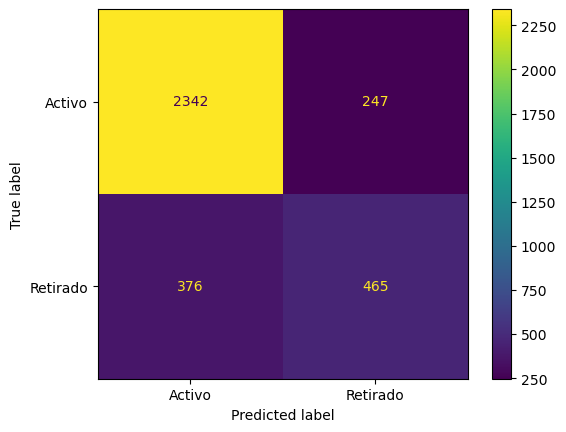

In [620]:
# Calculo de los valores de la matriz de confusión
cm = confusion_matrix(y_test, y_predict)

# Creación del gráfico de la matriz
etiquetas = ['Activo', 'Retirado'] # Etiquetas reales de las clases. Activo para 0 (Negative )y Retirado para 1 (Positive)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etiquetas)
disp.plot()
plt.show()

**Observaciones claves:**
 - El modelo predijo correctamente que 2342 empleados estaban activos.
 - El modelo predijo correctamente que 465 empleados se retiraron.
 - El modelo predijo que 247 empleados se retiraron, pero en realidad estaban activos.
 - El modelo predijo que 376 empleados estaban activos, pero en realidad se retiraron.

#### Informe de clasificación del modelo de regresión logística

In [623]:
etiquetas = ['Estará activo', 'Estará retirado'] 
print(classification_report(y_test, y_predict, target_names=etiquetas))

                 precision    recall  f1-score   support

  Estará activo       0.86      0.90      0.88      2589
Estará retirado       0.65      0.55      0.60       841

       accuracy                           0.82      3430
      macro avg       0.76      0.73      0.74      3430
   weighted avg       0.81      0.82      0.81      3430



**Observaciones claves:**
 - El modelo es correcto aproximadamente el 82% de las veces (accuracy).
 - Solo el 55% de los empleados que se retiraron fueron correctamente identificados (recall-retirado).
 - El modelo identifica correctamente al 90% de los empleados activos (recall-activo).
 - Cuando el modelo predice que un empleado se retiró, tiene razón el 65% de las veces (precision-retirado).
 - El F1-score es 60%, lo cual representa un equilibrio entre precisión y sensibilidad. Este valor es útil para evaluar el desempeño global del modelo para esta clase minoritaria.

#### Creación de una dataframe resumen de las métricas del modelo

El `classification_report` de scikit-learn no incluye el AUC (Area bajo la curva) como una de las métricas por defecto. Esta es una de las métricas que buscamos examinar del modelo para tomar desiciones de selección y optimización, así que la calcularemos individualmente y agruparemos todos los resultados en una misma tabla (dataframe).

In [627]:
nombre_modelo = 'Logistic Regression'
auc = roc_auc_score(y_test, model_logreg.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

resultados_logreg = pd.DataFrame({'model': [nombre_modelo],
                                  'auc': [auc],
                                  'accuracy': [accuracy],
                                  'precision': [precision],
                                  'recall': [recall],
                                  'F1': [f1]
                                })

In [628]:
resultados_logreg # Se muestra la tabla resultado

,model,auc,accuracy,precision,recall,F1
0,Logistic Regression,0.881229,0.818367,0.65309,0.552913,0.598841


**Observaciones claves:**
 - Los resutados son iguales a los obtenidos por el `classification_report` de scikit-learn, solo que se adicionó la métrica `roc_auc` que no muestra por defecto y se muestran los valores con mayor exactitud decimal.
 - Un AUC de 0.88 indica que el modelo tiene una buena capacidad de discriminación. Es capaz de distinguir bastante bien entre empleados que se van a retirar (clase 1) y los que se quedan (clase 0), ya que el AUC está cerca de 1, lo que sugiere que el modelo tiene un buen desempeño general.
 - Dado que la prioridad del proyecto es identificar a los empleados que se retirarán (la clase 1), el recall es la métrica más importante. Un recall de 0.55 sugiere que el modelo está dejando pasar muchos casos de empleados que realmente se retiran. En este caso, incrementar el recall sería crucial, ya que perder a un empleado por no detectarlo es más costoso que un falso positivo (un empleado que no se retira pero es identificado como tal).

<div class="alert alert-block alert-info">
    <b>✅</b><b> CONCLUSIONES DEL MODELO DE REGRESIÓN LOGÍSTICA</b> 
</div>

 > - La mayoría de las predicciones realizadas por el modelo son correctas (accuracy aceptable).
> 
 > - El modelo funciona muy bien a la hora de predecir empleados activos (recall alto).
> 
 > - El modelo produce una cantidad significativa de falsos negativos (376 empleados retirados clasificados como activos).
> 
 > - El modelo presenta dificultad para identificar empleados que realmente se retiraron (recall bajo).
>  - El objetivo del proyecto da prioridad sobre la predicción de empleados que se retirarán, por tanto la métrica prioritaria es el recall para la clase "Estará retirado" (55%), ya que es crucial detectar a la mayor cantidad posible de empleados que se retirarán. Actualmente, casi la mitad de los empleados que se retiran pasan desapercibidos. También es importante mantener un equilibrio razonable con la precisión (65%) para evitar un número excesivo de falsos positivos y mantener una buena capacidad de desicriminación del modelo (AUC = 0.88).



**Pasos a seguir:**

Una de las posibles pasos a seguir es mejorar el perfomance del modelo en la métrica prioritaría ajustando el umbral de decisión. Cómo es más importante identificar empleados que se retirarán, se podría reducir el umbral de clasificación del modelo y favorecer la clase minoritaria ("Estará retirado" = 1). Reducir el umbral de probabilidad por debajo de 0.5 podría aumentar el recall, aumentando la sensibilidad. Esto en teoría, podría incrementar los verdaderos positivos.

Otra posible paso es descartar la optimizaicón del modelo y probar directamente otros modelos alternativos: Algunos algoritmos, como XGBoost o Random Forest, podrían manejar mejor este tipo de desequilibrios, y es lo que se decide hacer a continuación.

## 6.3. Construcción del ***Modelo de bosque aleatorio (Random Forest)***

### 6.3.1. Supuestos a tener en cuenta del modelo

El modelo de Random Forest es un algoritmo de aprendizaje supervisado basado en árboles de decisión. A diferencia de modelos más tradicionales como la regresión logística que se implementó anteriormente, los modelos de Random Forest no tienen supuestos estrictos sobre la distribución de los datos, valores extremos atípicos, ni la relación entre las variables. Sin embargo, para garantizar un buen desempeño y evitar problemas, es útil considerar los siguientes puntos:
- Asegurar datos limpios y representativos. ✅
- Codificar correctamente las variables categóricas. ✅
- Considerar el balance de clases si se trabaja con datos desbalanceados. ✅

**Observaciones claves:**
 - Los tres factores claves que benefician el desempeño final del Modelo Random Forest se consideran optimos y suficientes. 

### 6.3.2. Particionamiento de los datos

Se procede a  dividir los datos en variables predictivas y variable objetivo, para luego particionarlos en un subgrupo para entrenamiento (train) y otro subgrupo de prueba (test), siguiendo el siguiente orden:

- 1) Definir una variable y que aísle la variable objetivo.

- 2) Definir una variable X que aísle el conjunto de variables predictoras.

- 3) Dividir los datos en una proporción 75/25 entre un conjunto de entrenamiento y un conjunto de prueba, estratificando las divisiones.

In [638]:
# 1. Selección de la variable objetivo
y = df_encoded.copy()
y = y['retiro']

# 2. Selección de las variables predictivas
X = df_encoded.copy()
X = X.drop(columns=['retiro'])

# 3. Divición de los datos en un conjunto de entrenamiento y un conjunto de prueba, estratificando según los valores en y,
# ya que las clases no pueden considerarse balanceadas (76,2% para la clase 0 / 23.8% para la clase 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

### 6.3.3. Construcción del modelo

#### Instanciar el clasificador basado en Random Forest

In [641]:
rf = RandomForestClassifier(random_state=42)

#### Creación de el diccionario con el rango de valores de hiperparámentros para afinar el modelo

In [643]:
# Por el momento solo se evaluará un par de valores por parámetros para mayor simplicidad y reducción del tiempo de entrenamiento
# pero en escenarios más realistas se debe asignar un diccionarió con un rango mayor de valores.
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

#### Se define el conjunto de métricas de evaluación

In [645]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

#### Se instancia el objeto GridSearchCV

In [647]:
model_rf = GridSearchCV(estimator=rf, param_grid = cv_params, scoring = scoring, cv = 4, refit='recall')

#### Ajuste del modelo Random Forest al conjunto de entrenamiento

In [649]:
#%%time
#model_rf.fit(X_train, y_train) # Wall time: 26min 26seg

#### Guardar el modelo y leerlo con la librería "Pickle"

In [651]:
# Se define la ruta local donde se guardará el modelo
ruta = ''

# Se define una función de escritura para guardar el modelo
def guardar_modelo(ruta, modelo, nombre_guardado:str):
    '''
    ruta: es el directorio de archivos donde se guardará el modelo en formato pickle
    modelo: es el modelo que se desea guardar 
    nombre_guardado: es el nombre del archivo como se guardará el modelo en la ruta
    '''
    with open(ruta + nombre_guardado + '.pickle', 'wb') as to_write:
        pickle.dump(modelo, to_write)

# Se define una función de lectura para volver a leer el modelo
def leer_modelo(ruta, nombre_guardado:str):
    '''
    ruta: es el directorio de archivos donde se guardará el modelo en formato pickle
    nombre_guardado: es el nombre del archivo como se guardó el modelo en la ruta
    '''
    with open(ruta + nombre_guardado + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
        return model

In [652]:
#guardar_modelo(ruta, model_rf, 'modelo_rf_cv' ) # Se usa la función definida anteriormente para guardar el modelo con Pickle

In [653]:
model_rf = leer_modelo(ruta, 'modelo_rf_cv') # Se usa la funcion definida anteriormente para leer el modelo guardado

#### Obtención del mejor puntaje de "Recall" logrado por el modelo

In [655]:
model_rf.best_score_

0.9663933694754925

**Observaciones claves:**
 - Este modelo tiene un rendimiento excepcional, con un puntaje promedio de recall equivalente a 0.966 (9.66%) en los cuatro "folds" configurados para validación cruzada. Después de verificarse, más adelante, el puntaje de precisión para garantizar de que el modelo no esté clasificando todas las observaciones como "1: Retirado", podría concuirse si este modelo está haciendo clasificaciones casi perfectas o no.

#### Revisión de la mejor combinación de hiperparámetros

In [658]:
model_rf.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

**Observaciones claves:**
 - De todas las posibles combinaciones posibles según el rango de valores establecido para cada parámetro. El resulto arriba, muestra la combinación más óptima del modelo.

#### Creación de una función que agrupe las métricas del modelo

In [661]:
def funcion_resultados(nombre_modelo:str, modelo_objeto, metrica:str):
    '''
    Arguments:
    nombre_modelo (string): El nombre del modelo que aparecerá en la tabla resultado
    modelo_objeto: El objeto GridSearchCV ajustado a los datos
    metrica (string): la métrica prioritaria (auc, precision, recall, f1, accuracy)

    '''

    # Crea un diccionario que mapea la métrica de entrada al nombre real de la métrica en GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Agrupa todos los resultados de la validación cruzada en un mismo dataframe
    cv_results = pd.DataFrame(modelo_objeto.cv_results_)

    # Se aisla la fila del DataFrame con el puntaje máximo de la métrica.
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metrica]].idxmax(), :]

    # Extraer las métricas accuracy, precision, recall y f1 score de esa fila.
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Se crea la tabla de resultados
    table = pd.DataFrame({'model': [nombre_modelo],
                          'auc': [auc],
                          'accuracy': [accuracy],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1]
                        })

    return table

#### Obtención de las métricas del modelo entrenado

In [663]:
resultados_rf = funcion_resultados('CV:Random Forest Model 1', model_rf, 'recall' )
resultados_rf

,model,auc,accuracy,precision,recall,F1
0,CV:Random Forest Model 1,0.991763,0.989154,0.98778,0.966393,0.976956


**Observaciones claves:**
 - Con un valor de 0.991763 (99,18%), el AUC es extremadamente alto, lo que indica que el modelo tiene una capacidad excelente para discriminar entre las dos clases (empleado se retirará vs. no se retirará).
 - El modelo tiene una exactitud de 0.989154, lo que significa que el 98.9% de las predicciones realizadas por el modelo son correctas. Este es un valor muy alto, aunque la exactitud puede no ser siempre la mejor métrica cuando se trabaja con clases desbalanceadas como es el caso de los datos ( 23.8% la clase minoritaria "1:Retirado").
 -  Con una precisión de 0.98778 (98,78%), el modelo tiene un rendimiento muy bueno en cuanto a la cantidad de empleados que ha predicho como "Retirado" y que realmente lo hicieron.
 -  El recall es de 0.966393, lo que significa que el modelo está identificando aproximadamente el 96.6% de todos los empleados que realmente se retirarán. Un valor alto de recall es especialmente importante en este tipo de tareas donde la prioridad es identificar todos los casos positivos (empleados que se retirarán) para tomar medidas preventivas, por ser la situación con un mayor costo asociado.
 -  Con un F1 Score de 0.976956 (97,69%), el modelo muestra un buen balance entre precisión y recall. Este valor alto sugiere que el modelo está equilibrado y funcionando bien en ambos sentidos: tiene una alta precisión y un buen recall.

#### Integración de las métricas del Modelo entrenado de Random Forest con los del modelo probado de Regresión Logística

In [666]:
resultados = pd.concat([resultados_logreg, resultados_rf], axis = 0)
resultados

,model,auc,accuracy,precision,recall,F1
0,Logistic Regression,0.881229,0.818367,0.65309,0.552913,0.598841
0,CV:Random Forest Model 1,0.991763,0.989154,0.98778,0.966393,0.976956


#### Obtención de las métricas de desempeño del modelo con el conjunto de datos de prueba (test)

In [668]:
model_rf_predict = model_rf.best_estimator_.predict(X_test)

In [669]:
# Se define una función que calcule y agrupe las métricas del modelo para el conjunto de datos de prueba
def resultado_metricas_conjunto_prueba(nombre_modelo:str, predicciones, y_test):
    '''
    Argumentos:
    nombre_modelo (string): Nombre del modelo que aparecerá en la tabla resultado
    predicciones: Array de las predicciones de la variable de salida
    y_test: Array del conjunto particionado "y_test"

    '''
    auc = roc_auc_score(y_test, predicciones)
    accuracy = accuracy_score(y_test, predicciones)
    precision = precision_score(y_test, predicciones)
    recall = recall_score(y_test, predicciones)
    f1 = f1_score(y_test, predicciones)

    table = pd.DataFrame({'model': [nombre_modelo],
                          'auc': [auc],
                          'accuracy': [accuracy],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1]
                        })
    return table

In [670]:
# Se usa la función `resultado_metricas_conjunto_prueba()` para generar las métricas del modelo con el conjunto de datos de prueba
resultados_rf_conjunto_prueba = resultado_metricas_conjunto_prueba('TEST: Random Forest Model 1', model_rf_predict, y_test)
resultados_rf_conjunto_prueba

,model,auc,accuracy,precision,recall,F1
0,TEST: Random Forest Model 1,0.979703,0.986667,0.97735,0.966405,0.971847


#### Integración de las métricas del Modelo probado de Random Forest con los otros resultados

In [672]:
resultados = pd.concat([resultados, resultados_rf_conjunto_prueba], axis = 0)
resultados

,model,auc,accuracy,precision,recall,F1
0,Logistic Regression,0.881229,0.818367,0.65309,0.552913,0.598841
0,CV:Random Forest Model 1,0.991763,0.989154,0.98778,0.966393,0.976956
0,TEST: Random Forest Model 1,0.979703,0.986667,0.97735,0.966405,0.971847


**Observaciones claves:**
 -  Al comparar los dos modelos, Random Forest supera ampliamente a Regresión Logística en todas las métricas clave. En términos de AUC, Random Forest obtiene valores excepcionales de 0.9918 (99.18%) en entrenamiento y 0.9797 (97.98%)en prueba, mientras que Regresión Logística se queda en solo 0.8812 (88.12%). En exactitud (accuracy), Random Forest alcanza 98.9% en entrenamiento y 98.7% en prueba, frente al 81.8% de Regresión Logística.
 -  La precisión de Random Forest (98.8% en entrenamiento y 97.7% en prueba) también es mucho más alta que la de Regresión Logística (65.3%), lo que indica menos falsos positivos. En cuanto a recall, Random Forest identifica correctamente el 96.6% de los empleados que se retirarán, mientras que Regresión Logística solo lo hace en el 55.3%, lo que refleja una mayor tasa de falsos negativos en el segundo caso.
 -  Finalmente, el F1 score de Random Forest (97.7% en entrenamiento y 97.2% en prueba) es mucho más alto que el de Regresión Logística (59.9%), lo que muestra un mejor equilibrio entre precisión y recall.

<div class="alert alert-block alert-info">
    <b>✅</b><b> CONCLUSIONES DEL MODELO DE REGRESIÓN LOGÍSTIVA VS BOSQUE ALEATORIO</b> 
</div>

 > - El modelo Random Forest (tanto el entrenado como el probado en los datos de prueba) es claramente superior al modelo de Regresión Logística en todas las métricas clave (AUC, exactitud, precisión, recall y F1 score).
> 
 > - Random Forest no solo tiene una capacidad superior para discriminar entre las clases (AUC más alto), sino que también tiene un excelente desempeño en términos de precisión y recall, lo que es crítico en este caso, ya que el objetivo es predecir correctamente los empleados que se retirarán (clase 1).
>
>  - Dado que la prioridad del proyecto es predecir correctamente los empleados que se retirarán (cuando la variable de salida toma valor 1), el modelo Random Forest es el más adecuado. Tiene un alto recall (minimiza los falsos negativos), una alta precisión (minimiza los falsos positivos) y un excelente F1 score, lo que lo convierte en el modelo más confiable para este tipo de predicción.
> 
 > - Aunque el modelo de Regresión Logística es razonable, su rendimiento en cuanto a recall y precision es inferior, lo que sugiere que no es la mejor opción para este caso específico.

**Pasos a seguir:**

Se procederá a evaluar un modelo alternativo adicional, antes de decidir cual es el modelo que mejor se ajusta a los datos y consigue, a su vez, el mejor desempeño con base en el objetivo principal del proyecto de modelado.

## 6.4. Construcción del ***Modelo de potenciación de gradiente extremo(XGBoost)***

### 6.4.1. Supuestos a tener en cuenta del modelo

Aunque XGBoost no tiene supuestos estrictos como otros modelos estadísticos (por ejemplo, regresión logística), para obtener un rendimiento óptimo; al igual que ocurre con el Modelo de Random Forest, es importante:
- Manejar adecuadamente las variables importantes. ✅
- Evitar valores atípicos extremos ✅
- Realizar un buen preprocesamiento de los datos. ✅
- Ajustar adecuadamente los parámetros del modelo, como el número de árboles, la profundidad máxima y la tasa de aprendizaje. ✅

**Observaciones claves:**
 - Los cuatro factores claves que benefician el desempeño final del Modelo XGBoost se considera optimos y suficientes.

### 6.4.2. Partición de los datos

Dado que la partición (split) del conjunto de datos original, ya se realizó en el apartado "6.4.3 Partición de los datos" antes de construir el modelo Random Forest, y teniendo presente que se utilizará el mismo tamaño del conjunto de prueba junto a la estratificación de la variable dependiente, no es necesario volver a reparticionar el dataframe original. En este sentido, se continua directamente la instancia del algoritmo de clasificación XGBoost.

### 6.4.3. Construcción del modelo

#### Instancia del clasificador basado en XGBoost

In [684]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

#### Creación de el diccionario con el rango de valores de hiperparámentros para afinar el modelo

In [686]:
cv_params = {'learning_rate': [0.05, 0.1],
             'max_depth': [3,5,7],
             'min_child_weight': [1,2,3],
             'n_estimators': [100,300,500],
             'subsample': [0.7, 0.8, 1.0]
             }

#### Se define el conjunto de métricas de evaluación

In [688]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

#### Se instancia el objeto GridSearchCV

In [690]:
model_xgb = GridSearchCV(estimator=xgb, param_grid = cv_params, scoring = scoring, cv = 4, refit='recall')

#### Ajuste del modelo Random XGBoost al conjunto de entrenamiento

In [692]:
#%%time
#model_xgb.fit(X_train, y_train) # Wall time: 4min 34seg

#### Guardar el modelo y leerlo con la librería "Pickle"

In [694]:
# Se define la ruta local donde se guardará el modelo
ruta = ''

# Se usa la función definida anteriormente para guardar el modelo con Pickle
#guardar_modelo(ruta, model_xgb, 'modelo_xgb_cv' ) 

In [695]:
# Se usa la funcion definida anteriormente para leer el modelo guardado
model_xgb = leer_modelo(ruta, 'modelo_xgb_cv') 

#### Obtención del mejor puntaje de "Recall" logrado por el modelo

In [697]:
model_xgb.best_score_

0.9690069830221092

**Observaciones claves:**
 - El modelo tiene un desempeño significativamente bueno, con un puntaje promedio de recall equivalente a 0.969 (9.69%) en los cuatro "folds" configurados para validación cruzada. Esto es un 0,03% aproximadamente por encima que lo mostrado por el modelo Random Forest. Podría concluirse que este modelo realiza las clasificaciones casi perfectas en tal caso se valide el puntaje de precisión, con el objetivo de garantizar de que el modelo no esté clasificando todas las observaciones como "1: Retirado".

#### Revisión de la mejor combinación de hiperparámetros

In [700]:
model_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 2,
 'n_estimators': 500,
 'subsample': 1.0}

**Observaciones claves:**
 - De todas las posibles combinaciones posibles según el rango de valores establecido para cada parámetro. El resulto arriba, muestra la combinación más óptima de hiperparámentros para el modelo.

#### Obtención de las métricas del modelo entrenado

Se usa la función `resultado_metricas_conjunto_prueba()` definida anteriormente en la construcción del Modelo Random Forest, para generar las métricas del modelo XGBoost con el conjunto de datos de prueba.

In [704]:
resultados_xgb = funcion_resultados('CV:XGBoost Model 1', model_xgb, 'recall' )
resultados_xgb

,model,auc,accuracy,precision,recall,F1
0,CV:XGBoost Model 1,0.993888,0.98871,0.983342,0.969007,0.976102


**Observaciones claves:**
 - Un valor de AUC de 0.9939 (99,39%) significa que el modelo tiene un rendimiento sobresaliente en la tarea de clasificación, capaz de distinguir correctamente entre los dos grupos posibles, los empleados que sa quedan y los que se retiran.
 - La exactitud del modelo es de aproximadamente 98.9%, lo que significa que el modelo clasifica correctamente un 98.9% de las observaciones, tanto de empleados que se quedan como de empleados que se retiran.
 -  La precisión es muy alta (98.3%), lo que significa que, cuando el modelo predice que un empleado se retirará (es decir, cuando el modelo clasifica a un empleado como 1), la probabilidad de que esto sea cierto es bastante alta.
 -  El recall es igualmente alto (96.9%), lo que significa que el modelo captura la gran mayoría de los empleados que realmente se retirarán (verdaderos positivos). El modelo está identificando correctamente a casi todos los empleados en riesgo de renunciar a su cargo.
 -  El F1 score, que es la media armónica entre la precisión y el recall, también es muy alto (97.6%), lo que significa que el modelo no está sacrificando ninguna de estas métricas en favor de la otra.
 -   Dado que la prioridad del proyecto es identificar cuándo un empleado se retirará (valor 1), el modelo es eficaz en minimizar tanto los falsos positivos (precisión alta) como los falsos negativos (recall alto), lo que es esencial para intervenir de manera adecuada y a tiempo. El hecho de que tanto la precisión como el recall sean altos indica que el modelo está bien ajustado y no está sobreajustando ni subajustando, lo que es ideal para la aplicación de predicciones en un entorno empresarial real.

#### Integración de las métricas del Modelo entrenado XGBoost con los resultados de los demás modelos

In [707]:
resultados = pd.concat([resultados, resultados_xgb], axis = 0)
resultados

,model,auc,accuracy,precision,recall,F1
0,Logistic Regression,0.881229,0.818367,0.653090,0.552913,0.598841
0,CV:Random Forest Model 1,0.991763,0.989154,0.987780,0.966393,0.976956
0,TEST: Random Forest Model 1,0.979703,0.986667,0.977350,0.966405,0.971847
0,CV:XGBoost Model 1,0.993888,0.988710,0.983342,0.969007,0.976102


#### Obtención de las métricas de desempeño del modelo con el conjunto de datos de prueba (test)

In [709]:
model_xgb_predict = model_xgb.best_estimator_.predict(X_test) # Predicciones del modelo sobre el conjunto de prueba

In [710]:
# Se usa la función `resultado_metricas_conjunto_prueba()` para generar las métricas del modelo con el conjunto de datos de prueba
resultados_xgb_conjunto_prueba = resultado_metricas_conjunto_prueba('TEST: XGBoost Model 1', model_xgb_predict, y_test)
resultados_xgb_conjunto_prueba

,model,auc,accuracy,precision,recall,F1
0,TEST: XGBoost Model 1,0.980193,0.988,0.984018,0.965286,0.974562


#### Integración de las métricas del Modelo probado de XGBoost con los otros resultados

In [712]:
resultados = pd.concat([resultados, resultados_xgb_conjunto_prueba], axis = 0)
resultados

,model,auc,accuracy,precision,recall,F1
0,Logistic Regression,0.881229,0.818367,0.653090,0.552913,0.598841
0,CV:Random Forest Model 1,0.991763,0.989154,0.987780,0.966393,0.976956
0,TEST: Random Forest Model 1,0.979703,0.986667,0.977350,0.966405,0.971847
0,CV:XGBoost Model 1,0.993888,0.988710,0.983342,0.969007,0.976102
0,TEST: XGBoost Model 1,0.980193,0.988000,0.984018,0.965286,0.974562


**Observaciones claves:**
 -  Los modelos de Random Forest y XGBoost superan con creces al de Regresión Logística en términos de capacidad de discriminación, con un puntaje AUC muy cercanos a 1 para los modelos entrenados, lo que indica un desempeño excelente para predecir correctamente los empleados que se retiraron. Sin embargo, los resultados de los modelos probados muestran que el modelo XGBoost es un insiificativamente mejor que el Random Forest, con 0.00049 puntos porcentuales de diferencia. El AUC de la regresión logística es significativamente más bajo que el de los modelos Random Forest y XGBoost.
 -  Para TEST: Random Forest (Accuracy = 98.67%) y TEST: XGBoost (Accuracy = 98.80%), la exactitud es un poco menor que sus modelos entrenados, sin embargo, sigue siendo muy alta en el conjunto de prueba, lo que demuestra que ambos modelos no están sobreajustados y mantienen su rendimiento. Ambos modelos muestran una exactitud significativamente superior a la de la Regresión Logística, lo que sugiere que estos modelos tienen un mejor rendimiento general, especialmente en cuanto a la clasificación correcta de todas las observaciones.
 -  Para TEST: Random Forest (Precision = 97.73%) y TEST: XGBoost (Precision = 98.40%): La precisión en el conjunto de prueba es alta aunque menor que la que muestran sus modelos entrenados, no obstante, XGBoost muestra una ligera ventaja en este caso. La precisión del modelo de regresión logística es considerablemente baja (65,31%), lo que indica que, cuando predice que un trabajador se retirará (valor 1), solo una moderada fracción de esas predicciones son correctas.
 -  Los modelos de Random Forest y XGBoost tienen un recall mucho más alto que la Regresión Logística, lo que los hace más adecuados para la tarea de identificar a todos los empleados en riesgo de abandono, lo cual es crucial en un proyecto de retención de empleado. Para el caso de los modelos entrenados, XGBoost es ligeramente superior al Random Forest pero por otro lado, en el caso de los modelos probados, Random Forest es ligeramente superior a XGBoost.
 -  El F1 score de la regresión logística es bajo, lo que refleja un desempeño subóptimo en el balance entre precisión y recall. Ambos modelos de árboles (Random Forest y XGBoost) tienen un F1 score muy alto, lo que indica que mantienen un excelente balance entre precisión y recall, y son capaces de identificar correctamente tanto a los empleados que se retiran como evitar las predicciones incorrectas. Los F1 scores en el conjunto de prueba para estos dos modelos siguen siendo muy altos, lo que demuestra que no estan sobreajustados y que mantienen su rendimiento de manera consistente. En el modelo entrenado Random Forest es ligeramente superior y en el modelo probado XGBoost lo es.

<div class="alert alert-block alert-info">
    <b>✅</b><b> CONCLUSIONES DEL MODELO DE REGRESIÓN LOGÍSTIVA VS BOSQUE ALEATORIO VS XGBoost</b> 
</div>

 > - Aunque la regresión logística es un modelo más sencillo, su rendimiento es mucho más bajo en comparación con los modelos de Random Forest y XGBoost, especialmente en cuanto a precisión, recall y F1 score. La AUC también es significativamente más baja, lo que indica una peor capacidad de discriminación entre las clases.
>  - En cuanto a Random Forest y XGBoost, ambos modelos muestran un desempeño sobresaliente en todas las métricas clave, especialmente en AUC, precisión, recall y F1 score. Además, mantienen un buen rendimiento en los conjuntos de prueba, lo que sugiere que no están sobreajustados y son capaces de generalizar bien. XGBoost tiene una ligera ventaja sobre Random Forest en términos de precision y F1 score, pero ambos modelos son altamente efectivos para la predicción del abandono de empleados.

**Pasos a seguir:**

Se pudo observar que tanto el Modelo Random Forest como el Modelo XGBoost presentaron métricas significativamente altas, muy cercanas a 1. Y para descartar que este ocurriendo una fuga de datos se realizará una ingeniería de variables, exactamente sobre la variable "promedio_horas_mes", ya que es muy posible que esta variable sea una fuente de fuga de datos. Si los empleados ya han decidido renunciar, o han sido identificados por la gerencia como personas a despedir, es posible que estén trabajando menos horas en consecuencia, y por tanto esté condicionando un filtrado conveniente de los datos. Además, se optará por no incluir la variable "satisfaccion" en el nuevo conjunto de datos de entrenamiento y prueba, con el objetivo de medir el desempeño de estos dos modelos sobre datos menos caracterizados.

Anteriormente, el ajuste de ambos modelos incluyó todas las variables como características de las observaciones. Ahora se procederá a eliminar la variable "satisfaccion" de los datos de entrenamiento y prueba, y adicionalmente, se creará una nueva variable que estime si un empleado está sobrecargado de trabajo o no.

## 6.5. Ingeniería de datos

### 6.5.1. Eliminación de la variable "satisfaccion"

In [718]:
# Se elimina la columna satisfaccion y se guarda el resultado en un nuevo dataframe
df_encoded2 = df_encoded.drop(columns=['satisfaccion'])

# Se validan los cambios realizados
df_encoded2.head()

,desempeño,numero_proyectos,promedio_horas_mes,tiempo_en_empresa,accidente_laboral,retiro,ascenso,salario,departamento_finanzas,departamento_gerencia y admon,departamento_i+d,departamento_mantenimiento,departamento_operaciones,departamento_publicidad,departamento_rr.hh.,departamento_sistemas,departamento_ventas
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,False,True
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,False,True
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,False,True
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,False,True
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,False,True


### 6.5.2. Creación de la variable "sobrecarga"

En el apartado, 4. Análisis de variables, se determinó que las horas promedios para una jornada mensual laboral en Colombia es de 191.67 horas/mes. Así mismo, se decidió clasificar como sobrecarga de trabajo todas los valores de `promedio_horas_mes` superiores a 200, permitiendo un supuesto de unas 8 horas extras promedio necesarias por empleado para terminar sus tareas mensuales. Teniendo esto presente, se decide crear una variable llamada `sobrecarga` de tipo binario que asigne 1 cuando exista sobrecarga laboral y 0 cuando no sea el caso.

In [721]:
# Creación de la columna "sobrecarga", que tomará los valores de la columna "promedio_horas_mes"
df_encoded2['sobrecarga'] = df_encoded2['promedio_horas_mes']

# Conversión de los valores de la columna "sobrecarga" a valor binario, donde se considera verdadero o 1 cuando hay sobrecarga de trabajo
# y falso o 0 cuando no hay sobrecarga de trabajo
df_encoded2['sobrecarga'] = np.where(df_encoded2['sobrecarga']>200, 1, 0)

# Se valida que las extracciones y transformaciones se hicieran correctamente
df_encoded2.head()

,desempeño,numero_proyectos,promedio_horas_mes,tiempo_en_empresa,accidente_laboral,retiro,ascenso,salario,departamento_finanzas,departamento_gerencia y admon,departamento_i+d,departamento_mantenimiento,departamento_operaciones,departamento_publicidad,departamento_rr.hh.,departamento_sistemas,departamento_ventas,sobrecarga
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,False,True,0
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,False,True,1
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,False,True,1
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,False,True,1
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,False,True,0


### 6.5.3. Eliminación de la variable "promedio_horas_mes"

Se elimina la columna `promedio_horas_mes` ya que se utilizó como base para la ingeniería de datos. Mantenerla sería redundante y generaría colinealidad con la nueva variable `sobrecarga`, a pesar de que los modelos Random Forest y XGBoost no se vean influenciados significativamente por este hecho.

In [724]:
# Se elimina la columna "promedio_horas_mes"
df_encoded2 = df_encoded2.drop(columns=['promedio_horas_mes'])

# Se validan los cambios
df_encoded2.head()

,desempeño,numero_proyectos,tiempo_en_empresa,accidente_laboral,retiro,ascenso,salario,departamento_finanzas,departamento_gerencia y admon,departamento_i+d,departamento_mantenimiento,departamento_operaciones,departamento_publicidad,departamento_rr.hh.,departamento_sistemas,departamento_ventas,sobrecarga
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,False,True,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,False,True,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,False,True,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,False,True,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,False,True,0


### 6.5.4. Particionamiento del nuevo conjunto de datos

Se procede a  dividir los datos en variables predictivas y variable objetivo, para luego particionarlos en un subgrupo para entrenamiento (train) y otro subgrupo de prueba (test), siguiendo el siguiente orden:

- 1) Definir una variable y que aísle la variable objetivo.

- 2) Definir una variable X que aísle el conjunto de variables predictoras.

- 3) Dividir los datos en una proporción 75/25 entre un conjunto de entrenamiento y un conjunto de prueba, estratificando las divisiones.

In [727]:
# 1. Selección de la variable objetivo
y = df_encoded2['retiro']

# 2. Selección de las variables predictivas
X = df_encoded2.drop(columns=['retiro'])

# 3. Divición de los datos en un conjunto de entrenamiento y un conjunto de prueba, estratificando según los valores en y,
# ya que las clases no pueden considerarse balanceadas (76,2% para la clase 0 / 23.8% para la clase 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

## 6.6. Construcción del ***Modelo de bosque aleatorio (Random Forest) - Versión 2***

### 6.6.1. Construcción del modelo

In [730]:
# Instanciar el clasificador de Random Forest
rf2 = RandomForestClassifier(random_state=42)

# Por el momento solo se evaluará un par de valores por parámetros para mayor simplicidad y reducción del tiempo de entrenamiento
# pero en escenarios más realistas se debe asignar un diccionarió con un rango mayor de valores.
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Lista que contiene el conjunto de métricas a evaluar
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Se instancia el GridSearchCV
model_rf2 = GridSearchCV(estimator=rf, param_grid = cv_params, scoring = scoring, cv = 4, refit='recall')

### 6.6.2. Ajuste del modelo

In [732]:
#%%time
#model_rf2.fit(X_train2 y_train2) # Wall time: 39 min 2segundos

In [733]:
# Se define la ruta local donde se guardará el modelo
ruta = ''

# Se usa la función definida anteriormente para guardar el modelo con Pickle
#guardar_modelo(ruta, model_rf2, 'modelo_rf2_cv') 

In [734]:
# Se usa la funcion definida anteriormente para leer el modelo guardado
model_rf2 = leer_modelo(ruta, 'modelo_rf2_cv') 

### 6.6.3. Evaluación del modelo

#### Obtención del mejor puntaje de "Recall" logrado por el modelo

In [737]:
model_rf2.best_score_

0.9406286950895746

**Observaciones claves:**
 - El modelo tiene un desempeño significativamente bueno, aunque levemente menor que el modelo entrenado con el conjunto de datos original, con un puntaje promedio de recall equivalente a 0.940 (9.40%) en los cuatro "folds" configurados para validación cruzada. Esto es un 2,57 puntos porcentuales por debajo. Podría concluirse que la ingeniería de datos realizada para eliminar una posible característica (variable) sesgada y la transformación de otra, no afectó significativamente el puntaje de recall.

#### Revisión de la mejor combinación de hiperparámetros

In [740]:
model_rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

**Observaciones claves:**
 - De todas las posibles combinaciones posibles según el rango de valores establecido para cada parámetro. El resulto arriba, muestra la combinación más óptima del modelo, la cual difiere solo en el hiperparámentro de 'n_estimators' de la combinación de parámetros obtenida para el modelo ajustado a los datos originales.

#### Obtención de las métricas de desempeño del modelo entrenado

In [743]:
resultados_rf2 = funcion_resultados('CV:Random Forest Model 2', model_rf2, 'recall' )
resultados_rf2

,model,auc,accuracy,precision,recall,F1
0,CV:Random Forest Model 2,0.984023,0.96862,0.928713,0.940629,0.934562


#### Integración de las métricas del segundo Modelo Random Forest entrenado con los resultados anteriores

In [745]:
resultados = pd.concat([resultados, resultados_rf2], axis = 0)
resultados

,model,auc,accuracy,precision,recall,F1
0,Logistic Regression,0.881229,0.818367,0.653090,0.552913,0.598841
0,CV:Random Forest Model 1,0.991763,0.989154,0.987780,0.966393,0.976956
0,TEST: Random Forest Model 1,0.979703,0.986667,0.977350,0.966405,0.971847
0,CV:XGBoost Model 1,0.993888,0.988710,0.983342,0.969007,0.976102
0,TEST: XGBoost Model 1,0.980193,0.988000,0.984018,0.965286,0.974562
0,CV:Random Forest Model 2,0.984023,0.968620,0.928713,0.940629,0.934562


#### Obtención de las métricas de desempeño del modelo con el conjunto de datos de prueba (test)

In [747]:
model_rf2_predict = model_rf2.best_estimator_.predict(X_test2)

# Se usa la función `resultado_metricas_conjunto_prueba()` para generar las métricas del modelo con el conjunto de datos de prueba
resultados_rf2_conjunto_prueba = resultado_metricas_conjunto_prueba('TEST: Random Forest Model 2', model_rf2_predict, y_test2)
resultados_rf2_conjunto_prueba

,model,auc,accuracy,precision,recall,F1
0,TEST: Random Forest Model 2,0.960419,0.9696,0.930387,0.942889,0.936596


#### Integración de las métricas del segundo modelo probado de Random Forest con los otros resultados

In [749]:
resultados = pd.concat([resultados, resultados_rf2_conjunto_prueba], axis=0)
resultados

,model,auc,accuracy,precision,recall,F1
0,Logistic Regression,0.881229,0.818367,0.653090,0.552913,0.598841
0,CV:Random Forest Model 1,0.991763,0.989154,0.987780,0.966393,0.976956
0,TEST: Random Forest Model 1,0.979703,0.986667,0.977350,0.966405,0.971847
0,CV:XGBoost Model 1,0.993888,0.988710,0.983342,0.969007,0.976102
0,TEST: XGBoost Model 1,0.980193,0.988000,0.984018,0.965286,0.974562
0,CV:Random Forest Model 2,0.984023,0.968620,0.928713,0.940629,0.934562
0,TEST: Random Forest Model 2,0.960419,0.969600,0.930387,0.942889,0.936596


#### Comparación desempeño de los Modelos Random Forest

In [751]:
comparacion_rf = pd.concat([resultados_rf, resultados_rf2, resultados_rf_conjunto_prueba, resultados_rf2_conjunto_prueba], axis=0)
comparacion_rf

,model,auc,accuracy,precision,recall,F1
0,CV:Random Forest Model 1,0.991763,0.989154,0.987780,0.966393,0.976956
0,CV:Random Forest Model 2,0.984023,0.968620,0.928713,0.940629,0.934562
0,TEST: Random Forest Model 1,0.979703,0.986667,0.977350,0.966405,0.971847
0,TEST: Random Forest Model 2,0.960419,0.969600,0.930387,0.942889,0.936596


**Observaciones claves:**
 -  La ingeniería de datos (eliminación de `satisfacción` y la binarización de `promedio_horas_mes`) impactó negativamente la capacidad de discriminación del modelo. El primer Modelo Random Forest es más capaz de discriminar entre las clases con un AUC de 0.979703 en el conjunto de prueba contra AUC de 0.960419 del segundo modelo, lo que muestra una ligera pérdida en el desempeño de la capacidad del modelo para discriminar entre las clases tras la ingeniería realizada.
 -  Aunque ambos modelos tienen una exactitud alta (accuracy), el primero modelo Random Forest muestra un desempeño superior en este sentido. Esto sugiere que las transformaciones aplicadas al modelo 2 también redujo ligeramente la proporción de predicciones correctas.
 -  La transformación de las variables en el segundo Modelo Random Forest resulta en una disminución significativa en la precisión. Esto implica que el modelo 2 tiende a predecir más incorrectamente un retiro de lo que lo haría el primero Modelo Random Forest.
 -  La ingeniería de datos en el Random Forest Model 2 mejora la capacidad del modelo para identificar correctamente a los empleados que se retirarán, aunque a costa de una mayor cantidad de falsos positivos. Esto puede ser relevante para un proyecto donde la prioridad es identificar con precisión a los empleados que se retirarán.
 -  El primer Modelo Random Forest mantiene un mejor equilibrio entre precisión y recuperación, mientras que el segundo Modelo Random Forest presenta un F1 Score más bajo, lo cual sugiere que las transformaciones perjudicó también el balance entre ambas métricas.

<div class="alert alert-block alert-info">
    <b>✅</b><b> CONCLUSIONES DEL RANDOM FOREST MODEL 1 VS RANDOM FOREST MODEL 2</b> 
</div>

 > - La ingeniería de datos aplicada en el Random Forest Model 2 tiene un impacto negativo en la mayoría de las métricas clave, especialmente en AUC, precisión y F1. Aunque mejora la recuperación (recall), esta mejora no compensa las pérdidas en otras métricas importantes. Además, el Random Forest Model 1 es más estable y consistente, lo que lo convierte en una mejor opción en términos de rendimiento general y estabilidad.

## 6.7. Construcción del ***Modelo de potenciación de gradiente extremo (XGBoost) - Version 2***

### 6.7.1. Construcción del modelo

In [756]:
# Instanciar el clasificador de XGboost
xgb2 = XGBClassifier(objective='binary:logistic', random_state=42)

# Por el momento solo se evaluará un par de valores por parámetros para mayor simplicidad y reducción del tiempo de entrenamiento
# pero en escenarios más realistas se debe asignar un diccionarió con un rango mayor de valores.
cv_params = {'learning_rate': [0.05, 0.1],
             'max_depth': [3,5,7],
             'min_child_weight': [1,2,3],
             'n_estimators': [100,300,500],
             'subsample': [0.7, 0.8, 1.0]
             }

# Lista que contiene el conjunto de métricas a evaluar
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Se instancia el GridSearchCV
model_xgb2 = GridSearchCV(estimator=xgb2, param_grid = cv_params, scoring = scoring, cv = 4, refit='recall')

### 6.7.2. Ajuste del modelo

In [758]:
#%%time
#model_xgb2.fit(X_train2, y_train2) # Wall time: 6 min 14 seg

In [759]:
# Se define la ruta local donde se guardará el modelo
ruta = ''

# Se usa la función definida anteriormente para guardar el modelo con Pickle

#guardar_modelo(ruta, model_xgb2, 'modelo_xgb2_cv') 

In [760]:
# Se usa la funcion definida anteriormente para leer el modelo guardado
model_xgb2 = leer_modelo(ruta, 'modelo_xgb2_cv') 

### 6.7.3. Evaluación del modelo

#### Obtención del mejor puntaje de "Recall" logrado por el modelo

In [763]:
model_xgb2.best_score_

0.9376369274702719

**Observaciones claves:**
 - El alto valor de recall (93,77%) sugiere que el modelo es efectivo para detectar la mayoría de los casos de retiro. Este modelo está capturando muchas de las instancias de la clase positiva (1:retiro), lo cual es crucial si el objetivo es minimizar el riesgo de pasar por alto a empleados que realmente se retiran. Sin embargo, es importante tener en cuenta que un recall alto no necesariamente implica que el modelo esté equilibrado en cuanto a otras métricas (como precisión o F1-score), ya que puede haber un costo de falsos positivos, donde el modelo predice que un empleado se retirará cuando en realidad no lo hará. Pero dado que la prioridad del proyecto es el retiro del empleado, y en ese contexto es más crítico no pasar por alto a los empleados que efectivamente se retiran, el alto valor de recall es positivo.



#### Revisión de la mejor combinación de hiperparámetros

In [766]:
model_xgb2.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 500,
 'subsample': 1.0}

**Observaciones claves:**
 - De todas las posibles combinaciones posibles según el rango de valores establecido para cada parámetro. El resulto arriba, muestra la combinación más óptima del modelo, la cual difiere solo en el hiperparámentro de 'n_estimators' de la combinación de parámetros obtenida para el modelo ajustado a los datos originales.

#### Obtención de las métricas de desempeño del modelo entrenado

In [769]:
resultados_xgb2 = funcion_resultados('CV:XGBoost Model 2', model_xgb2, 'recall' )
resultados_xgb2

,model,auc,accuracy,precision,recall,F1
0,CV:XGBoost Model 2,0.984348,0.968975,0.932728,0.937637,0.935058


#### Integración de las métricas del segundo Modelo XGBoost entrenado con los resultados anteriores

In [771]:
resultados = pd.concat([resultados, resultados_xgb2], axis = 0)
resultados

,model,auc,accuracy,precision,recall,F1
0,Logistic Regression,0.881229,0.818367,0.653090,0.552913,0.598841
0,CV:Random Forest Model 1,0.991763,0.989154,0.987780,0.966393,0.976956
0,TEST: Random Forest Model 1,0.979703,0.986667,0.977350,0.966405,0.971847
0,CV:XGBoost Model 1,0.993888,0.988710,0.983342,0.969007,0.976102
0,TEST: XGBoost Model 1,0.980193,0.988000,0.984018,0.965286,0.974562
0,CV:Random Forest Model 2,0.984023,0.968620,0.928713,0.940629,0.934562
0,TEST: Random Forest Model 2,0.960419,0.969600,0.930387,0.942889,0.936596
0,CV:XGBoost Model 2,0.984348,0.968975,0.932728,0.937637,0.935058


#### Obtención de las métricas de desempeño del modelo con el conjunto de datos de prueba (test)

In [773]:
model_xgb2_predict = model_xgb2.best_estimator_.predict(X_test2)

# Se usa la función `resultado_metricas_conjunto_prueba()` para generar las métricas del modelo con el conjunto de datos de prueba
resultados_xgb2_conjunto_prueba = resultado_metricas_conjunto_prueba('TEST: XGBoost Model 2', model_xgb2_predict, y_test2)
resultados_xgb2_conjunto_prueba

,model,auc,accuracy,precision,recall,F1
0,TEST: XGBoost Model 2,0.959089,0.969333,0.932222,0.93953,0.935862


#### Integración de las métricas del segundo modelo XGBoost probado  con los otros resultados

In [775]:
resultados = pd.concat([resultados, resultados_xgb2_conjunto_prueba], axis=0)
resultados

,model,auc,accuracy,precision,recall,F1
0,Logistic Regression,0.881229,0.818367,0.653090,0.552913,0.598841
0,CV:Random Forest Model 1,0.991763,0.989154,0.987780,0.966393,0.976956
0,TEST: Random Forest Model 1,0.979703,0.986667,0.977350,0.966405,0.971847
0,CV:XGBoost Model 1,0.993888,0.988710,0.983342,0.969007,0.976102
0,TEST: XGBoost Model 1,0.980193,0.988000,0.984018,0.965286,0.974562
0,CV:Random Forest Model 2,0.984023,0.968620,0.928713,0.940629,0.934562
0,TEST: Random Forest Model 2,0.960419,0.969600,0.930387,0.942889,0.936596
0,CV:XGBoost Model 2,0.984348,0.968975,0.932728,0.937637,0.935058
0,TEST: XGBoost Model 2,0.959089,0.969333,0.932222,0.939530,0.935862


#### Comparación del desempeño de los Modelos XGBoost

In [777]:
comparacion_xgb = pd.concat([resultados_xgb, resultados_xgb2, resultados_xgb_conjunto_prueba, resultados_xgb2_conjunto_prueba], axis=0)
comparacion_xgb

,model,auc,accuracy,precision,recall,F1
0,CV:XGBoost Model 1,0.993888,0.988710,0.983342,0.969007,0.976102
0,CV:XGBoost Model 2,0.984348,0.968975,0.932728,0.937637,0.935058
0,TEST: XGBoost Model 1,0.980193,0.988000,0.984018,0.965286,0.974562
0,TEST: XGBoost Model 2,0.959089,0.969333,0.932222,0.939530,0.935862


**Observaciones claves:**

- El modelo 1 es claramente el mejor en términos de todas las métricas, especialmente en AUC, precisión y F1 score. Esto indica que, aunque el modelo 1 se entrenó sin ninguna ingeniería de datos adicional, es más eficaz para predecir los empleados que se retiran de la empresa.
- El modelo 2 tiene un recall inferior al modelo 1, tanto en los datos de entrenamiento (93.8% frente a 96.9%) como en los de prueba (93.9% frente a 96.5%). Esto significa que, aunque el modelo 2 puede estar identificando correctamente a los empleados que se retiran en una cantidad bastante alta, es menos efectivo que el modelo 1 para encontrar todos los casos positivos (empleados que se retiran).

<div class="alert alert-block alert-info">
    <b>✅</b><b> CONCLUSIONES DEL XGBoost MODEL 1 VS XGBoost MODEL 2</b> 
</div>

 > - El modelo 1 muestra un mejor desempeño en todas las métricas, lo que sugiere que, en este caso, las modificaciones en los datos no mejoraron el modelo, sino que lo hicieron más propenso a cometer errores. El modelo 2 no ha mejorado el recall, sino que lo ha reducido en comparación con el modelo 1, lo que indica que, aunque podría estar haciendo ajustes para mejorar la generalización o reducir el sobreajuste, no ha sido tan efectivo al identificar correctamente los empleados que se retiran.

# <b><div style='padding:13px;background-color:#592321;color:white;border-radius:3px;font-size:110%;text-align: left'>Tarea 7. Selección del modelo ganador</div></b>

## Objetivos:
- Identificar el modelo con mejor desempeño.

## Actividades:
- Selección del modelo ganador.
- Graficar la matríz de confusión del modelo ganador.

## 7.1. Resultado final de las comparaciones entre el desempeño de los tres tipos de modelos

In [783]:
resultado_final = pd.concat([resultados_logreg, resultados_rf_conjunto_prueba, resultados_xgb_conjunto_prueba], axis=0)
resultado_final

,model,auc,accuracy,precision,recall,F1
0,Logistic Regression,0.881229,0.818367,0.653090,0.552913,0.598841
0,TEST: Random Forest Model 1,0.979703,0.986667,0.977350,0.966405,0.971847
0,TEST: XGBoost Model 1,0.980193,0.988000,0.984018,0.965286,0.974562


<div class="alert alert-block alert-info">
    <b>💡</b><b> SELECCIÓN DEL MODELO GANADOR</b> 
</div>

 > El mejor modelo para el proyecto es el **`XGBoost Model 1`** debido a su AUC más alto (0.9802) y su recall muy alto (96.5%) en los datos de prueba. Aunque el Random Forest Model 1 tiene un desempeño muy similar, con el recall muy ligeramente superior al XGBoost Model 1, este último tiene una ligera ventaja en términos de capacidad para discriminar entre las clases (AUC), lo cual es importante en este proyecto de clasificación, donde identificar correctamente los empleados que se retiran es clave.
> 
 > Entonces, para la predicción sobre datos nuevos, XGBoost Model 1 es el modelo más adecuado.

## 7.2. Matriz de error o confusión del modelo ganador

Se grafica una matroz de confusión para visualizar la dinámica de predicciones del modelo sobre los datos de prueba.

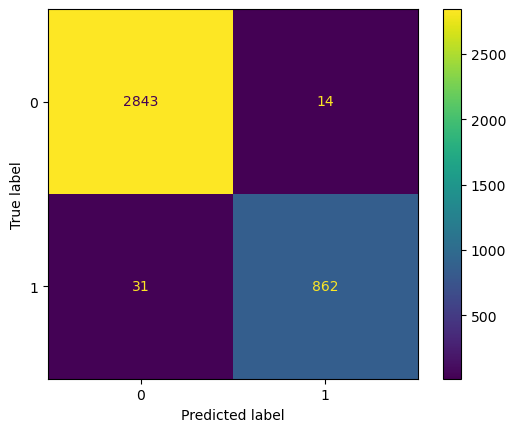

In [927]:
model_xgb_predict  # Predicciones del modelo sobre el conjunto de prueba, obtenidas en la fase de construcción y evaluación
cm = confusion_matrix(y_test, model_xgb_predict, labels = model_xgb.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

**Observaciones claves:**

Recordando que la variable de salida del modelo es `retiro`, donde 1 es presencia de la variable y 0 es ausencia de la variable, es decir, que el valor de 0 corresponde a un estado "activo" del empleado dentro de la empresa y 1 corresponde a un estado "retirado" de la empresa, se realizan las siguientes interpretaciones de la matriz de confusión.

 - El modelo predijo correctamente que 2843 empleados estan activos. Son empleados que no se retiraron de la empresa (clase 0) y el modelo los clasificó correctamente. Estos casos no tienen impacto negativo directo y tampoco son la prioridad del proyecto, sin embargo, es importante reconocer que el modelo también es atamente eficiente prediciendo a los empleados que no se retiran.
 - El modelo predijo correctamente que 862 empleados se retiraron. Son empleados que realmente se retiraron de la empresa (clase 1) y el modelo predijo correctamente que se iban a ir. Este es el resultado clave que el modelo debe maximizar, ya que identificar a los empleados que se retirarán es crítico para el proyecto.
 - El modelo predijo que 14 empleados se retiran, pero en realidad estan activos. Son empleados que no se retiraron (clase 0), pero el modelo predijo erróneamente que se iban a retirar (clase 1). Aunque es un error, tiene un menor impacto que los Falsos Negativos porque se pueden implementar estrategias de retención innecesarias, pero es menos costoso que perder al empleado.
 - El modelo predijo que 31 empleados estan activos, pero en realidad esta retirados. Son empleados que realmente se retiraron (clase 1), pero el modelo no logró predecirlo correctamente, clasificándolos como "No se va" (clase 0). Estos casos son los más costosos en términos de impacto empresarial, ya que no se toma acción para retenerlos debido a la predicción incorrecta.

<div class="alert alert-block alert-info">
    <b>✅</b><b> CONCLUSIONES</b> 
</div>

 > - El modelo es muy efectivo en identificar empleados en riesgo de irse. Esto es clave para el objetivo del proyecto.
>  - El modelo tiene una alta precisión, lo que minimiza los esfuerzos innecesarios en empleados que no se iban a retirar.
>  - Aunque los falsos negativos son pocos (31), reducirlos aún más podría mejorar la capacidad de retención de la empresa.
>  - El modelo está funcionando muy bien para los objetivos del proyecto. 

## 7.3. Contribuciones de las caracteristicas (variables) al modelo

Se calcula la importancia de las caractrísticas del modelo sobre el "best_estimator" reajustado al recall, ya que la prioridad del modelo es minimizar los falsos negativos puesto que estan asociados a un costo significativamente alto, dado que el proyecto busca predecir correctamente la deserción del trabajador para tomar acciones tempranas y evitar el fenómeno llamado "fuga de cerebros empresariales".

In [984]:
importances = model_xgb.best_estimator_.feature_importances_ # Uso del atributo "feature_importances_" sobre el objeto
xgb_importances = pd.Series(importances, index=X_test.columns) # Asignación de los nombres de características al array
xgb_importances = xgb_importances.sort_values(ascending=True) # Ordenamiento según el peso, de menor a mayor
xgb_importances

departamento_i+d                 0.006956
departamento_publicidad          0.007350
departamento_finanzas            0.009101
departamento_gerencia y admon    0.010449
departamento_rr.hh.              0.014942
departamento_sistemas            0.015438
departamento_mantenimiento       0.015487
ascenso                          0.016762
departamento_ventas              0.017485
salario                          0.022165
departamento_operaciones         0.024372
promedio_horas_mes               0.036751
accidente_laboral                0.051054
desempeño                        0.068857
numero_proyectos                 0.091401
satisfaccion                     0.219405
tiempo_en_empresa                0.372025
dtype: float32

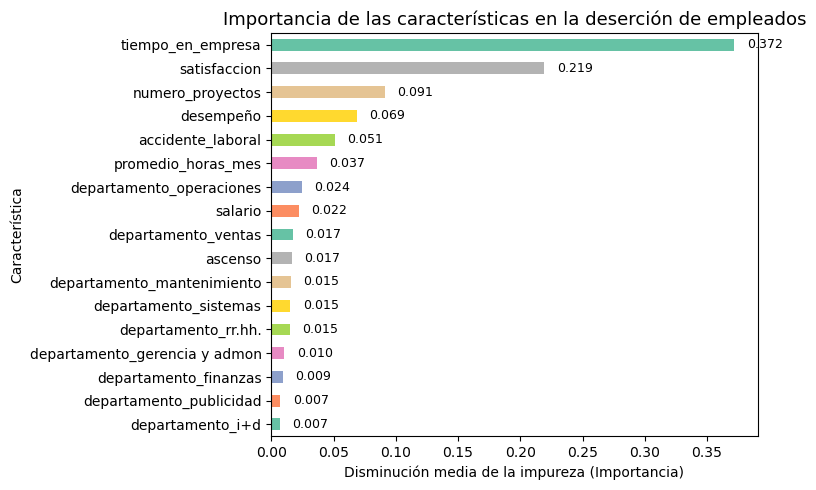

In [1061]:
fig, ax = plt.subplots(figsize=(8,5))

# Obtener la paleta de colores se seaborn
colors = sns.color_palette('Set2', n_colors=len(xgb_importances))

# Creación del gráfico de barras horizontales con la paleta de colores personalizada
xgb_importances.plot.barh(ax=ax, color=colors)

ax.set_title('Importancia de las características en la deserción de empleados', fontsize=13)
ax.set_xlabel('Disminución media de la impureza (Importancia)')

# Añadir etiquetas con el valor encima de las barras
for p in ax.patches:
    ax.text(p.get_width() + 0.01, p.get_y() + p.get_height() / 2, 
            f'{p.get_width():.3f}', ha='left', va='center', fontsize=9)

ax.set_ylabel('Característica')
fig.tight_layout()
plt.show()

**Observaciones claves:**

- El gráfico muestra que en este **modelo XGBoost** , la variable `tiempo_en_empresa` (antigüedad), es la característica más importante, lo que indica que la antigüedad del empleado es un fuerte predictor de la decisión de permanecer o abandonar la empresa. Probablemente, empleados con mayor tiempo en la empresa tienden a tener un comportamiento de retención o rotación distinto a los más nuevos, cuando son influidos negativamente por otras características. Tal como se demostró en el apartado `4.2 Revisión de las relaciones entre variables`, existen casos donde empleados con una antigüedad extremadamente corta y extremadamente larga, incluso por encima del valor máximo de los que se han retirado, seguían activos.
- El nivel de satisfacción es la segunda característica más importante. Esto sugiere que los empleados que sienten que sus expectativas profesionales no estan cubiertas por los beneficios laborales del cargo que ocupan tienen más probabilidades de dejar la empresa.
- La tecera característica más influyente es el numero de proyectos en los que ha participado el empleado, indicando también un impacto significativo en la deserción. Esto podría reflejar que una alta carga de trabajo (o una baja) puede influir en la rotación del talento humano.
- La productividad del empleado también es un predictor importante. Esto está relacionado directamente con la valoración de su desempeño por parte del empleador y cómo esto influye en la decisión de retirarlos del cargo, es decir que en estos casos la deserción no sería voluntaria del empleado sino que se relaciona con una decisión administrativa.
- Las demás características tienen una importancia muy cercana al 5% o inferior. Factores como el promedio mensual de horas trabajadas, el salario, el departamento de la empresa al que pertenecen o las promociones de cargo son mucho menos importantes al momento de influenciar la deserción del trabajador. No obstante, aunque los accidentes de trabajo tienen menor relevancia, el modelo sugiere que podría influir más significativamente en el retiro del talento humano de la organización.

<div class="alert alert-block alert-info">
    <b>💡</b><b> INSIGHT</b> 
</div>

> 1) Tiempo en la empresa y satisfacción son los factores más críticos. Esto sugiere que la empresa debe priorizar estrategias que mejoren la satisfacción laboral y considerar cómo tratar a los empleados con mayor antigüedad para evitar su desgaste.
> 
> 2) Cargar o subcargar a los empleados con proyectos debe ser monitoreado cuidadosamente, ya que el número de proyectos tiene un impacto relevante
>
> 3) La empresa puede implementar estrategias de seguridad laboral para mitigar el impacto de los accidentes, aunque este factor no sea tan importante como otros.
> 
> 4) Si bien las áreas (departamentos) tienen menor relevancia, podrían investigarse más a fondo aquellos con importancia moderada para identificar problemas específicos.

# <b><div style='padding:13px;background-color:#592321;color:white;border-radius:3px;font-size:110%;text-align: left'>Tarea 8. Recomendaciones y próximos pasos</div></b>

## 8.1. Recomendaciones

#### **Para mejorar la retención de talento humano, se proponen las siguientes recomendaciones iniciales:**

> - **Planes de carrera personalizados:** Crear planes que den claridad a los empleados sobre cómo pueden crecer dentro de la empresa con base en su antigüedad y desempeño.
> - **Beneficios por antigüedad:** Introducir incentivos para empleados leales, como bonos colaborativos, días de vacaciones adicionales o acceso a anticipos salariales.
> - **Prevención del desgaste profesional:** Monitorear a los trabajadores con más tiempo en la empresa para identificar signos de burnout o desmotivación.
> - **Programas de reconocimiento:** Implementar programas que reconozcan el esfuerzo y los logros de los empleados mes a mes, como "Empleado destacado" o bonos por desempeño.
> - **Flexibilidad laboral:** Considerar ofrecer opciones como horarios flexibles o trabajo híbrido/remoto que permitan mejorar la capacidad del empleado de atender sus otras necesidades profesionales y sociales.
> - **Balance en los proyectos:** Asegurarse de que el número de proyectos asignados a cada empleado sea manejable, implementando herramientas de trabajo (frameworks) que permitan planificar y distribuir mejor las tareas, con el objetivo de que la mayoría de trabajadores se enfoquen en un único proyecto a la vez.
> - **Evaluación periódica de la relación, carga laboral vs desempeño:** Analizar regularmente el desempeño y la carga laboral de cada empleado para hacer ajustes antes de que el exceso de horas extras se convierta en un problema.
> - **Bienestar institucional:** Ofrecer apoyo médico y psicológico a empleados que esten involucrados en novedades críticas de desempeño, satisfacción y accidentes laborales.
> - **Diagnóstico interno:** Realiza entrevistas o encuestas específicas en los departamentos con alta rotación (como operaciones y ventas) para identificar los microfactores que conducen a reportar una mayor alta rotación del talento que otras áreas.
> - Usar el modelo predictivo para identificar empleados con alto riesgo de rotación y priorizar intervenciones preventivas, como reuniones individuales para entender sus preocupaciones y buscar soluciones personalizadas.











## 8.2. Próximos pasos

#### **Próximos pasos a seguir para garantizar la correcta implementación de las recomendaciones:**

> - **Establecer KPIs:** Diseñar e implementar métricas más claras que permitan interpretar de mejor manera la dinámica de rotaciones, la satisfacción laboral y el índice de carga laboral, con miras a medir el impacto de las estrategias implementadas.
> - **Marco de mejora:** Cuando se identifique una rotación alta en un departamento específico, se recomienda trabajar al rededor del siguiente enfoque estratégico de mejora:
>   - 1) Analizar los niveles de satisfacción en el área.
>   - 2) Realizar entrevistas o grupos focales para identificar problemas específicos (ejemplo: carga de trabajo, liderazgo).
>   - 3) Implementar una solución como redistribuir tareas o capacitar al líder del equipo.
>   - 4) Monitorear los resultados durante un período de 3-6 meses.
>   - 5) Ajustar la estrategia según los datos obtenidos.
> - **Retroalimentación constante:** Involucrar a los empleados en la evaluación de las estrategias implementadas para mejorar continuamente las iniciativas generales e individuales para cada departamento.